# MACHINE LEARNING FOR PUBLIC POLICY
# Homework 2 - Cristina Mac Gregor Vanegas
### Due: April 17, 2018

The notebook is organized in the following way: First, all functions created in order to carry out the analysis are defined, for points 1 through 6. On a second part of the notebook, the functions are called ot excecute the analyisis
#### PART 1.A:
     1. Loading data
     2. Exploring data
     3. Pre-processing data
     4. Generating features and predictors. 
#### Part 1.B: 
     5. Building KNN classifier
     6. Evaluating the classifier. 
#### Part 2.A
    Running exploatory analysis
#### Part 2.B
    Running model

## PART 1.A


##### Read Data functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import geopandas as gpd
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

/Users/crismacgregor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def read_files(file_name):
    '''
    Reading in downloaded csv files.
    '''
    dframe = pd.read_csv(file_name)
    return dframe

##### Exploring and pre-processing data functions

In [3]:
def check_mv(frame, var):
    '''
    Prints out percentage of missing values for a given variable.
    '''
    frame["temp"] = frame[var].apply(lambda x: x if float(x) else np.nan)
    frame["temp2"] = frame[var].apply(lambda x: 1 if pd.isnull(x) else 0)
    print("Missing values", frame["temp2"].value_counts(True))


In [4]:
def clean_var(frame, var):
    '''
    Cleans variables from unwanted characters; removes outliers and fills in missing values 
    '''
    frame[var] = frame[var].apply(lambda x: np.nan if (x == "-") else float(x))
    
    #Winzorizing process: setting outliers to the value of the 99 percentile. 
    x99 = frame[var].quantile(.99)
    frame[var] = frame[var].apply(lambda x: x99 if x > x99  else x)  
    #Setting missing values to be the value of the mean
    x50 = frame[var].mean()
    print(x50)
    frame[var] = frame[var].apply(lambda x: x50 if pd.isnull(x) else x)  
    
    return frame

In [5]:
def get_stats(frame, target_var, group_vars = None):
    '''
    Prints general statistics for each variable, and if specified, also 
    means of grouped-by varibales, grouped by specified groups. 
    '''
    
    if not group_vars :
        print("\n", target_var, frame[target_var].describe())
        print(frame[target_var].value_counts(True))
    
    if group_vars is not None: 
        print(frame.groupby(group_vars)[target_var].mean())

In [6]:
def get_geo(shape_file, frame, var, shp_name, level_str):
    '''
    Creates a geopandas file at the geographical level specified, given a pandas
    dataframe and a shape or geojson file.
    Inputs: shape_file: shapefile or geojson file
            frame: pandas frame
            shp_name: name of column in geojson file
            level_str: name of column in frame
    Outputs:
        Extended geo frame (geopandas object)

    '''
    frame.groupby()
    geo_df = gpd.read_file(shape_file)
    geo_df = geo_df.rename(columns={shp_name: level_str})
    geo_df_ext = geo_df.merge(frame, on=level_str, how = 'left')
    return geo_df_ext

In [7]:
def print_map_byvar(frame, varbs):
    '''
    Plots a map of the geographic distribution of the variables we wish to see. 
    '''
    for i in varbs:
        geo_df.plot(column=i, cmap='OrRd')
        plt.title(i)
        plt.show()

In [8]:
def show_cor(frame):
    '''
    Prints spearman correlations from a complete dataframe
    '''
    return frame.corr("spearman")


In [9]:
def scat(frame, varbs, target_var):
    '''
    Prints scatter plots for all the possible features against the predicted variable. 
    '''
    pairs = []
    for i in varbs:
            plt.scatter(frame[target_var], frame[i])
            plt.title("{} vs {}".format(target_var, i))
            plt.xlabel(target_var)
            plt.ylabel(i)
            plt.show()


##### Generate features functions

In [11]:
def discretize_quartiles(frame, var):
    '''
    Returns a discrete variable with 
    '''
    new_name = str(var) + "_discrete_q" 
    x25 = frame[var].quantile(.25)    
    x50 = frame[var].quantile(.50)    
    x75 = frame[var].quantile(.75)
    x100 = frame[var].max()
    group = 1 
    last = 0
    frame[new_name] =  np.nan
    for ind, row in frame.iterrows():
        x = row[var]
        if (x <= x25) and (x > 0):
            frame[ind, new_name] = 1
        elif (x <= x50) and (x > x25):
            frame[ind, new_name] = 2
        elif (x <= x75) and (x > x50):
            frame[ind, new_name] = 3
        elif (x <= x100) and (x > x75):
            frame[ind, new_name] = 4
    return frame

In [12]:
def make_dummies(frame, var, threshold = None):
    '''
    Makes dummy variables for each category of a discrete variable. 
    '''
    if threshold: 
        new_name = str(var) + "_d" 
        frame[new_name] = frame.apply(lambda x: 1 if x[var] < threshold else 0)
    else:
        buckets = len(frame[var].value_counts())
        for i in buckets: 
            new_name = str(var) + "_d_" + str(i)
            frame[new_name] = frame.apply(lambda x: 1 if x[var] == i else 0)

## PART 1.B 

##### Build classifier

In [13]:
def drop_feats(varbs, frame):
    '''
    Deletes variables that we don't want to include as predicitve features
    '''
    f2 = frame.drop(varbs, axis=1)
    return f2

In [14]:
def split(frame, test_percentage, target_var):
    '''
    Splits data into train and test sections. 
    '''
    X = frame.drop(target_var, axis=1)
    Y = frame[target_var]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_percentage)

    return  x_train, x_test, y_train, y_test

In [ ]:
def knn_f(x_tr, y_tr, x_tst, y_tst, nn = 10, p =3, weights_ = 'distance'):
    '''
    Fits model and applies to testing data according to the specificities provided
    for the adjustment of the model.
    '''
    knn = KNeighborsClassifier(n_neighbors=nn, metric='minkowski', metric_params={'p': p}, weights=weights_)
    knn.fit(x_tr, y_tr)
    preds = knn.predict_proba(x_tst)
    return preds[:,1]

##### Evaluate classifier

In [30]:
def test_evals(output_array, real_vals, evals, threshold):
    '''
    Returns an evaluation meassure according to the test
    predictions and true values, according to a given threshold
    and according to the specified meassure of evaluation. 
    Inputs:
        output_array: (array) predicted values from test fraction of the data
        real_vals: (array) true values from test fraction of data (y_test)
        evals: (str) meassure of evaluation. Can be accuracy, recall, precision 
                    or specificity
        threshold: (float) threshold for predicted probabilities. 
    Outputs: 
        Score (float)
    '''
    
    test = {'pred': output_array, 'real': real_vals}
    test_f = pd.DataFrame(data=test)   
    TP, FP, TN, FN = 0, 0, 0, 0
    
    for indx, row in test_f.iterrows():
        status_predicted = 0
        print( row["pred"])
        if row["pred"] > threshold:
            status_predicted= 1 
        if (status_predicted == 1) and (row["real"]==1):
            TP += 1
        if (status_predicted == 1) and (row["real"]==0):
            FP += 1
        if (status_predicted == 0) and (row["real"]==0):
            TN += 1
        if (status_predicted == 0) and (row["real"]==1):
            FN += 1
        
            
    if (evals == 'accuracy') and((TP + TN + FP + FN) != 0):
       
        return (TP + TN) / (TP + TN + FP + FN)
    elif (evals == 'recall') and ((TP + FN)  != 0):
        return (TP) / (TP + FN)
    elif (evals == 'precision') and ((TP + FP )!= 0) :
        return (TP) / (TP + FP )
    elif (evals == 'specificity') and  ((TN) / (TN + FN) != 0):
        return (TN) / (TN + FN)
    else:
        return 0

In [27]:
def test_models(pvals, numn, weights, tested_param, threshold):
    '''
    Tests all possible specifications for a knn model given 
    -pvals (tuple) : the range of values for p in the knn model specification
    -numn (list) : the values of number of nieghbohrs that we want to test
    -weights (list) : kind of weights applied 
    -tested_param (str): meassure of evaluation. Can be accuracy, recall, precision 
                    or specificity
    -threshold (float):  threshold for predicted probabilities. 
    Outputs the information for the best model. 
    '''
    accuracy = 0 
    keep = (0,0,0,0)
    for p_vals in range(pvals[0], pvals[1]):
        for num_n in numn:
            for w in weights:
                pred = knn_f(xtrain, ytrain, xtest, ytest, num_n, p_vals, w)
                score_ = test_evals(pred, ytest, tested_param, threshold)
                if score_ > accuracy:
                    keep = (p_vals, num_n, w, score_)
                    accuracy = score_
    
    return keep 

## PART 2.A


In [19]:
csv = "data/credit-data.csv"
geo = "data/chi_boundaries_zip.geojson"
fr = read_files(csv)
fr.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [20]:
all_vars = ["SeriousDlqin2yrs", "RevolvingUtilizationOfUnsecuredLines", "age", 
            "zipcode", "NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio", 
            "MonthlyIncome","NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", 
            "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse",
            "NumberOfDependents"]

trgt_var = "SeriousDlqin2yrs"
for i in all_vars:
    print ("******", i,"****** \n")
    print("Missing values percentages; 0 = not missing; 1 = mv")
    check_mv(fr, i)
    print("-----------")
    get_stats(fr, i)
    print("----------- \n" )


****** SeriousDlqin2yrs ****** 

Missing values percentages; 0 = not missing; 1 = mv
Missing values 0    1.0
Name: temp2, dtype: float64
-----------

 SeriousDlqin2yrs count    41016.000000
mean         0.161400
std          0.367904
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64
0    0.8386
1    0.1614
Name: SeriousDlqin2yrs, dtype: float64
----------- 

****** RevolvingUtilizationOfUnsecuredLines ****** 

Missing values percentages; 0 = not missing; 1 = mv
Missing values 0    1.0
Name: temp2, dtype: float64
-----------

 RevolvingUtilizationOfUnsecuredLines count    41016.00000
mean         6.37587
std        221.61895
min          0.00000
25%          0.03431
50%          0.18973
75%          0.66716
max      22000.00000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
1.000000    0.079432
0.000000    0.068364
1.000000    0.000122
0.950100    0.000098
0.713147    0.000098


****** NumberRealEstateLoansOrLines ****** 

Missing values percentages; 0 = not missing; 1 = mv
Missing values 0    1.0
Name: temp2, dtype: float64
-----------

 NumberRealEstateLoansOrLines count    41016.000000
mean         1.008801
std          1.153826
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         32.000000
Name: NumberRealEstateLoansOrLines, dtype: float64
0     0.385557
1     0.342964
2     0.204871
3     0.040472
4     0.014702
5     0.005217
6     0.002462
7     0.001341
9     0.000683
8     0.000585
10    0.000293
12    0.000219
11    0.000195
13    0.000171
15    0.000073
14    0.000049
19    0.000024
16    0.000024
17    0.000024
18    0.000024
32    0.000024
25    0.000024
Name: NumberRealEstateLoansOrLines, dtype: float64
----------- 

****** NumberOfTime60-89DaysPastDueNotWorse ****** 

Missing values percentages; 0 = not missing; 1 = mv
Missing values 0    1.0
Name: temp2, dtype: float64
-----------

 NumberOfTime60-

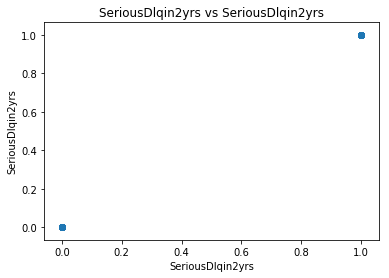

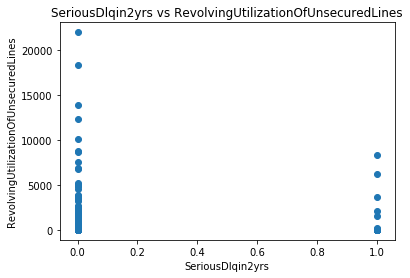

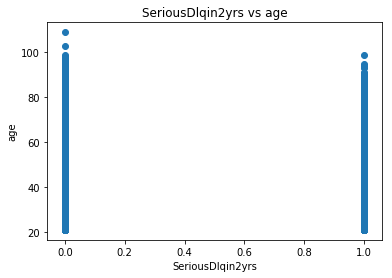

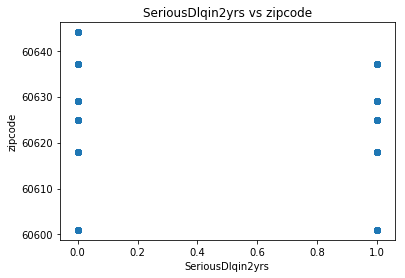

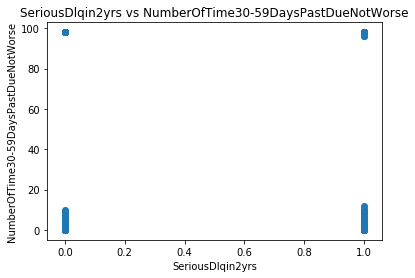

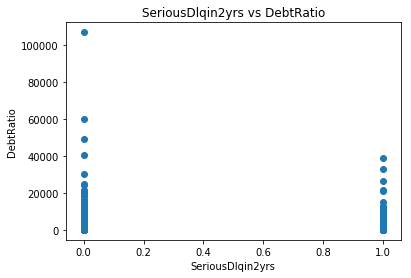

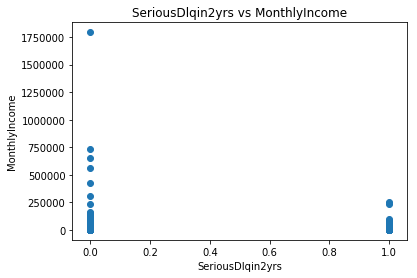

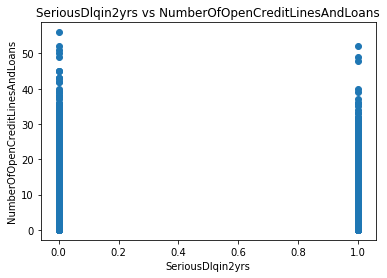

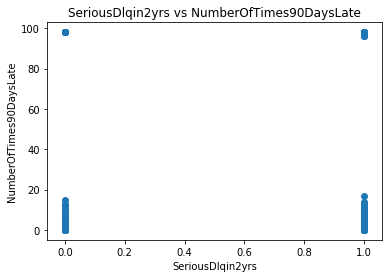

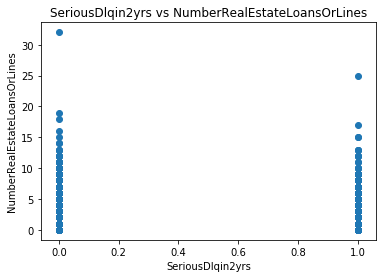

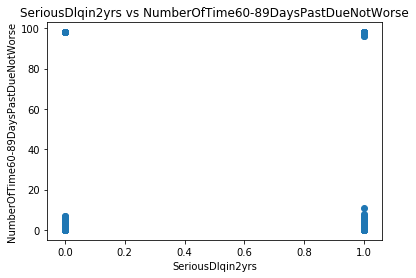

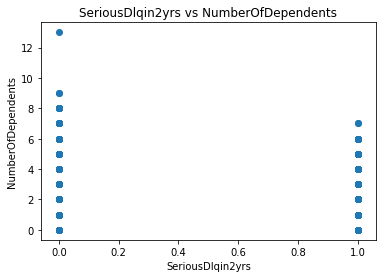

NameError: name 'x' is not defined

In [21]:
scat(fr, all_vars, trgt_var)

corr = show_cor(fr)
x #shows correlation grid 

#we are particularly interested in the way seriousDIqin2yrs is related to other variables. We see that variables who have higher relation are Revolving Utilization of Unsecuted lines, and all the variables counting the number of times late, in particular the number of times 90 days late.
#Since, in turn, NumberOfTimes90DaysLate is relatively highly correlated with those meassuring DaysPastDueNotWorse, we will only focus on this variable from this group. 

# Age seems to be relatively strong, but zipcode and number of dependents seems less strongly correlated. We proceed to 
# observe dinamics grouping by zipcode and number of dependents. Monthly income is moderately and negatively correlated with 
# the target variable

In [22]:
vars_selected = ["SeriousDlqin2yrs", "age", "DebtRatio", 
            "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", 
            "NumberRealEstateLoansOrLines", "NumberOfDependents"]

#Printing stats by zipcode
for i in vars_selected: 
    print ("******", i,"****** \n")
    get_stats(fr, i, "zipcode")
    print("----------- \n" )

****** SeriousDlqin2yrs ****** 

zipcode
60601    0.169753
60618    0.176406
60625    0.169560
60629    0.166744
60637    0.180516
60644    0.000000
Name: SeriousDlqin2yrs, dtype: float64
----------- 

****** age ****** 

zipcode
60601    51.650848
60618    51.623026
60625    51.720707
60629    51.498529
60637    51.426503
60644    52.840945
Name: age, dtype: float64
----------- 

****** DebtRatio ****** 

zipcode
60601    326.090201
60618    351.840384
60625    318.771680
60629    319.513465
60637    355.413892
60644    329.127883
Name: DebtRatio, dtype: float64
----------- 

****** MonthlyIncome ****** 

zipcode
60601    6939.742488
60618    6414.652413
60625    6506.113519
60629    6437.078613
60637    6389.541109
60644    7274.661621
Name: MonthlyIncome, dtype: float64
----------- 

****** NumberOfOpenCreditLinesAndLoans ****** 

zipcode
60601    8.569784
60618    8.338598
60625    8.398171
60629    8.329463
60637    8.330973
60644    8.540945
Name: NumberOfOpenCreditLinesAndLoans,

In [23]:
test_percentage = .3
# we can also further loop changing test percentage. 
vars_remove = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "temp", "temp2"]
fr2 = drop_feats(vars_remove, fr)

In [24]:
feats = ["RevolvingUtilizationOfUnsecuredLines", "age", 
         "zipcode","DebtRatio", "MonthlyIncome","NumberOfOpenCreditLinesAndLoans", 
          "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines",
         "NumberOfDependents"]

xtrain, xtest, ytrain, ytest = split(fr2, test_percentage, trgt_var)  
for i in xtrain, xtest: 
    for v in feats:         
        clean_var(i, v)

0.3585331004056015
51.59088850963045
60623.75845494758
301.68694177443314
6245.321231968795
8.37905332450977
0.1484448469227822
0.9872174427919612
0.7600385824521292
0.35600520307014133
51.780820804551
60623.97748882568
295.99247400160715
6277.759063975097
8.313856156034133
0.14668833807395368
0.9968305566842747
0.7718361558354885


In [ ]:
pvals = (1, 10)
numn = [1,5,10,20,40,80,100]
ws = ['uniform','distance']
test_param = 'accuracy'
thresh = .5 #Note: can also loop further with threshold
best_model = test_models(pvals, numn, ws, test_param, thresh)
print("Best p:", best_model[0])
print("Number of neighborhs:", best_model[1])
print("W: ", best_model[2])
print("Score for {}: {}".format(test_param, best_model[3]))

/Users/crismacgregor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  


1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0


1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0


1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0


0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.8
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.8
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.6
0.0
1.0
0.6
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.6
0.8
1.0
1.0
0.8
1.0
1.0
0.6
0.8
0.8
1.0
1.0
1.0
0.8
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
0.8
0.8
0.8
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
0.8
1.0
0.8
0.8
0.8
0.0
1.0
0.6
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
0.8
0.6
1.0
1.0
0.8
0.6
1.0
1.0
0.8
0.0
1.0
1.0
1.0
1.0
0.8
0.8
0.8
1.0
1.0
1.0
1.0
0.8
1.0
0.8
0.8
0.8
0.8
1.0
0.2
1.0
1.0
1.0
1.0
0.8
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.8
1.0
0.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.6
1.0
1.0
1.0
0.0
1.0
1.0
0.8
1.0
0.8
1.0
0.8
1.0
1.0
0.8
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.8
0.8
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.8
0.8
0.8
1.0
1.0
0.8
0.8
1.0
0.0
1.0
0.8
1.0
0.8
1.0
0.0
1.0
1.0
0.0
0.8
1.0
1.0
0.8
0.8
1.0
0.8
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0


1.0
0.8
1.0
0.0
0.8
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
0.8
1.0
0.8
0.8
1.0
1.0
0.8
1.0
1.0
0.8
1.0
0.8
1.0
1.0
0.6
0.8
1.0
0.0
0.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.8
0.6
0.8
0.8
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.4
1.0
0.8
1.0
0.8
1.0
0.6
1.0
0.0
0.8
1.0
0.8
1.0
1.0
0.8
0.0
1.0
0.0
1.0
1.0
0.8
0.8
1.0
0.8
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.8
1.0
0.8
1.0
0.0
1.0
0.8
1.0
0.0
1.0
0.8
0.8
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
0.8
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.0
0.6
1.0
0.0
1.0
1.0
0.8
0.8
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.8
0.8
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
0.8
1.0
0.8
0.8
1.0
0.8
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
0.8
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.8
1.0
0.6
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.8
1.0
0.6
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.8
1.0
1.0
0.0
1.0
1.0
0.8
1.0
1.0
0.8
0.8
1.0
0.8
1.0
0.6
0.8
1.0
0.8
1.0
1.0
1.0
0.8
1.0
0.8
0.8
1.0
1.0
1.0
0.8
1.0
0.0
1.0
0.0
0.8
1.0
1.0
0.8
0.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
0.8
0.8
1.0
0.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.8
0.0
0.8
0.8
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.8
0.8
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.8
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.8
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.0
1.0
0.8
0.8
0.8
1.0
1.0
0.8
0.8
0.8
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
0.0
0.8
1.0
1.0
0.8
1.0
0.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
0.0
1.0


1.0
1.0
1.0
0.0
0.8
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.8
0.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.8
1.0
0.8
1.0
1.0
0.6
1.0
1.0
1.0
0.8
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
0.8
0.8
1.0
0.8
1.0
0.0
0.8
1.0
1.0
1.0
0.8
1.0
0.0
0.8
0.0
1.0
1.0
1.0
1.0
0.8
1.0
0.6
1.0
0.8
0.4
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.0
1.0
0.8
0.0
0.4
0.8
0.8
0.6
1.0
1.0
1.0
0.8
0.8
0.0
0.8
1.0
1.0
0.8
1.0
0.0
1.0
0.8
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
0.8
0.8
0.8
1.0
0.8
1.0
0.8
1.0
1.0
1.0
1.0
0.8
1.0
0.6
0.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
0.6
0.6
1.0
1.0
1.0
1.0
1.0
0.8
0.8
1.0
1.0
1.0
0.8
0.8
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.8
1.0
1.0
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.8
1.0
1.0
0.8


1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
0.8
0.8
1.0
1.0
1.0
0.4
0.0
0.8
1.0
0.8
1.0
1.0
0.8
1.0
1.0
1.0
0.0
0.8
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.4
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
0.0
1.0
1.0
0.8
1.0
0.0
1.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.8
0.6
1.0
0.8
1.0
0.8
1.0
1.0
0.6
1.0
1.0
1.0
0.6
0.8
1.0
1.0
1.0
1.0
0.8
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.8
0.8
0.8
1.0
0.8
1.0
1.0
0.8
0.8
1.0
0.8
0.0
1.0
0.0
0.8
1.0
0.8
0.8
0.8
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.8
0.0
1.0
1.0
0.0
0.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.8
1.0
0.8
0.8
1.0
1.0
1.0
1.0
0.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.0
0.8
1.0
0.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.8
0.8
1.0
0.8
1.0
0.8
0.8
1.0
1.0
1.0
0.8
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8
0.0
1.0
0.6
1.0
0.0
1.0
0.8
0.8
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
0.8
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.8238672015579327
1.0
0.6959878409130227
1.0
1.0
0.7106619437124047
0.8118114111860143
1.0
1.0
1.0
1.0
0.0
1.0
0.8352088491308106
0.8099821557725093
0.0
1.0
0.8260483648572061
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9151293676911666
1.0
0.8354002804395971
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.4428258589292948
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.857458775163833
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8512117255574033
0.7017427006052372
1.0
0.8171767136627749
0.4971896947547974
1.0
1.0
1.0
1.0
1.0
0.8170496320463712
1.0
0.8997220768162029
0.8713966018050446
1.0
0.7896142014725209
0.8726615305610198
1.0
1.0
0.77843094033655
1.0
0.8261880808152697
1.0
1.0
0.8466441765751956
0.7331697146524446
1.0
1.0
1.0
0.8320717543299367
0.7664025961384502
1.0
0.0
0.8654973973834965
0.812414433451711
1.0
1.0
1.0
1.0
0.9018013785836346
1.0
1.0
0.7533847874409223
1.0
1.0
1.0
0.8324828503893702
0.8271669506436168
1.0
1.0
1.0
1.0
0.833131726138866
1.0
0.8235937838891939
0.0
0.816171831

0.0
1.0
1.0
0.0
1.0
0.8431831698677833
0.7128357093383196
1.0
1.0
0.7996896905334724
1.0
1.0
1.0
1.0
0.7696258320577057
1.0
0.6551531219157013
1.0
1.0
1.0
1.0
1.0
0.8482566264083806
1.0
1.0
1.0
1.0
0.8456500151397666
1.0
1.0
1.0
1.0
1.0
1.0
0.7564755912455591
1.0
0.9400694523317953
0.8040308107382739
0.8095897306210635
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8301411510001878
1.0
0.0
1.0
0.8025592067888435
0.6156046798251252
0.5423607819569297
0.8327703710137632
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.8844397757221873
0.8178925538559729
0.729138522189405
0.8544998539223959
1.0
1.0
1.0
1.0
1.0
0.706446862869526
1.0
1.0
1.0
0.9073592252625051
1.0
1.0
1.0
0.9124908354147866
1.0
0.8411573554351015
1.0
1.0
0.8504761154278296
1.0
1.0
1.0
1.0
0.8322405588371719
0.0
1.0
0.0
1.0
1.0
0.6845100900370499
0.8175429766765958
1.0
0.8434715544744152
0.0
0.648296788570082
0.0
1.0
1.0
0.9024634890007583
1.0
0.6973470946385902
0.8206410317246104
1.0
1.0
1.0
0.8260705226159354
1.0
1.0
1

1.0
0.6476808505939067
1.0
0.0
0.8578265176135191
1.0
0.5962917303362922
1.0
1.0
0.8418835873497732
0.0
1.0
0.0
1.0
1.0
0.817899348199961
0.8293818111665767
1.0
0.71676111344408
1.0
1.0
1.0
0.42873763840833135
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.7932440817082114
1.0
0.8591020549228958
1.0
0.0
1.0
0.7002898610663635
1.0
0.0
1.0
0.8665149888353729
0.8839262198368316
1.0
0.5196002382668334
1.0
1.0
1.0
1.0
1.0
1.0
0.8734918319928957
1.0
0.8405302006080168
1.0
0.5965799751416191
1.0
1.0
1.0
0.6722086576217804
1.0
1.0
1.0
1.0
0.0
0.6748448979937387
1.0
0.0
1.0
1.0
0.9048626399031119
0.8649993074512381
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.8315767154699344
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8749552083194971
0.8358242326029706
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.8363223066435967
0.8623063836376169
0.6061445416148342
1.0
1.0
1.0
1.0
1.0
1.0
0.7919031014868092
1.0
1.0
0.6569202282550626
1.0
1.0
1.0
1.0
0.5265098041530822
1.0
1.0
1.0
1.0
0.94085404833407

1.0
0.8100322540480214
1.0
1.0
1.0
0.7521937724466232
0.79283527251113
1.0
1.0
0.7612793169126726
0.5963715847747025
1.0
0.8460748077032219
1.0
1.0
0.8341097455668915
0.0
1.0
0.0
1.0
0.0
0.7654722570341037
1.0
1.0
1.0
0.7678810490005203
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.798705088465799
1.0
1.0
1.0
1.0
1.0
0.8479775970932769
1.0
1.0
0.9319561623473634
1.0
0.8133800540671382
0.0
1.0
0.7432162570290879
1.0
1.0
0.0
0.0
0.8111377441797688
1.0
1.0
0.8422055410010977
0.8219540440231242
1.0
0.856566057617797
1.0
1.0
1.0
1.0
1.0
1.0
0.7284815429164081
1.0
1.0
0.7409900980974129
1.0
0.6744357776778802
1.0
0.5594520173312006
0.8248148180929253
1.0
1.0
1.0
0.6400691872515512
1.0
1.0
1.0
0.7797632725253613
1.0
0.0
0.0
1.0
0.8092989839126276
0.7713358925953526
0.4704116241541692
1.0
1.0
0.8253006061044933
1.0
1.0
1.0
1.0
1.0
0.8344604054468113
0.7591856902710777
0.849178003279947
1.0
0.611567928120986
1.0
1.0
1.0
1.0
0.8043750590591076
1.0
1.0
1.0
0.7992379252875924
1.0
0.8277917

0.7515574218483686
0.7118139052511794
1.0
1.0
1.0
0.8277424047833853
0.0
0.828754316218246
1.0
0.9149756700112269
1.0
0.0
0.8526382141383231
1.0
0.7785197597931616
0.8453581360096193
0.0
0.7937804969862478
1.0
1.0
0.0
1.0
0.8515237529814053
1.0
0.7562267978664362
1.0
0.8161345668392226
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.8482294724755551
1.0
1.0
1.0
0.7954005811775969
1.0
1.0
1.0
1.0
1.0
0.5782617544951789
0.8544047858984408
1.0
0.0
1.0
0.8912461780685984
0.870097703322509
1.0
0.6950988669163469
1.0
0.9189211295764134
1.0
1.0
1.0
1.0
1.0
0.9152102674572874
0.7949295528298039
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.8127124524596588
1.0
1.0
0.7935005051908881
1.0
1.0
0.8476430425719156
0.8073242945041704
0.8215625065682505
0.0
1.0
1.0
1.0
1.0
0.5189747535072208
1.0
1.0
0.8451914530548816
1.0
1.0
0.41032628455602066
1.0
0.8504026393333791
1.0
0.8000751288109552
1.0
1.0
1.0
1.0
0.843627463141521
1.0
1.0
1.0
1.0
1.0
0.8550520043427083
0.8262037023752387
1.0
0.8552398930092694
0.7349333287911992
0.0
1.0
1.0

1.0
0.0
0.8657081653875603
1.0
1.0
1.0
1.0
0.6220210467547728
1.0
1.0
0.7064965703114123
1.0
1.0
0.8342581996879327
0.6190437270895465
0.8361946497502034
0.0
1.0
0.0
1.0
1.0
1.0
0.7835105772426734
1.0
0.8025783704792833
1.0
0.8040679783972687
1.0
0.0
0.6676623179080907
1.0
1.0
1.0
1.0
1.0
1.0
0.8731207225977534
0.6729049958854014
1.0
1.0
1.0
0.8358876505731979
0.6565900133873661
0.8239688527942123
0.7999681360381415
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8039623729723895
1.0
1.0
0.0
1.0
1.0
1.0
0.6502199580890474
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.774437528450395
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.724274720746707
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.848634377941599
0.8363802866077621
1.0
0.0
0.0
1.0
1.0
1.0
0.7595586532723725
0.8687731616246563
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7901800398971409
1.0
0.877653352609944
1.0
1.0
0.0
0.8868369055332956
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6613551275510636
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.670563472869016
0.8273406392980892
1.0

1.0
1.0
0.0
1.0
0.7489434961113043
0.0
0.8829181803647137
0.7197540501058521
0.817771142340017
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.7701201263650609
1.0
1.0
0.0
1.0
1.0
1.0
0.7837400606848489
0.0
0.7595804952013667
0.8180763653634908
1.0
1.0
1.0
0.6969850691044494
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.8026411520661365
0.8055513917790933
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8035508713418126
1.0
0.33684888142708924
0.5461367330691749
0.0
0.0
1.0
0.6891744780865483
0.8461320577453143
0.7303644664324588
1.0
0.8387562111408918
1.0
1.0
1.0
1.0
1.0
1.0
0.8898707103850412
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.8288767346002449
1.0
0.8747796779753061
1.0
1.0
1.0
0.8779064351342953
1.0
0.7745972108359367
1.0
0.7287507106661211
1.0
0.0
0.7931790070614706
1.0
1.0
0.8688188580057109
1.0
0.0
1.0
0.7882066992647291
1.0
1.0
1.0
0.8128956691912437
1.0
1.0
1.0
1.0
1.0
1.0
0.7961892841724215
0.0
1.0
0.7945845692402942
1.0
1.0
0.7515644197456384
0.4235781196814625
1.0
1.0
1.0
1.0
0.48382496069544

0.820677458625212
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8159946617089332
0.8560776039103112
0.0
1.0
1.0
0.8800177926536553
0.7312744308117287
1.0
1.0
0.0
0.0
0.877855521718113
0.0
1.0
1.0
1.0
0.48084259673762847
1.0
1.0
1.0
1.0
1.0
0.6166386207163294
1.0
0.8270637110964777
1.0
1.0
1.0
0.43055987507791155
0.8452207205987802
1.0
1.0
0.0
0.4640287358298287
1.0
1.0
1.0
1.0
1.0
0.8863454494130667
1.0
0.8339475711064599
1.0
1.0
1.0
0.0
1.0
1.0
0.8864962243158151
0.5873484578357879
1.0
0.6313480235768849
0.7596668397339732
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7457405858995046
0.7106515762364224
0.8245306586764585
0.8623959764244629
1.0
0.8504708078841727
0.8470795519972005
0.8786982445864714
1.0
0.0
1.0
0.42119024397642846
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6851062446753619
1.0
1.0
1.0
1.0
1.0
1.0
0.8309612685071812
1.0
0.8323217895130018
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.783160177435307
1.0
1.0
0.7807235653693049
1.0
0.7602797727551036
0.8226971680580297
1.0
0.0
1

1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.9
1.0
1.0
1.0
0.8
0.9
0.9
1.0
0.0
1.0
0.0
1.0
0.9
1.0
0.9
0.8
0.9
0.0
0.9
0.0
0.4
0.0
0.9
1.0
0.0
0.0
1.0
0.0
0.9
1.0
1.0
1.0
0.9
0.9
1.0
0.9
0.9
1.0
0.9
0.9
1.0
1.0
0.9
1.0
0.8
0.9
0.0
0.9
1.0
0.0
0.7
1.0
0.9
1.0
1.0
1.0
0.9
1.0
0.9
1.0
0.0
0.8
1.0
0.9
1.0
1.0
0.9
1.0
0.9
1.0
0.9
0.0
0.0
0.9
1.0
1.0
0.0
0.0
1.0
0.6
1.0
0.9
0.9
1.0
0.9
1.0
1.0
0.9
0.9
1.0
1.0
0.9
0.7
0.9
1.0
0.0
0.9
1.0
1.0
0.9
1.0
1.0
1.0
0.5
1.0
0.8
1.0
0.9
1.0
1.0
0.0
1.0
1.0
0.8
0.8
1.0
1.0
0.9
0.8
0.8
0.9
1.0
1.0
1.0
0.9
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.9
0.9
0.9
0.8
1.0
0.0
1.0
0.9
0.8
1.0
1.0
0.8
1.0
1.0
0.0
0.9
1.0
1.0
0.9
1.0
1.0
1.0
0.9
0.0
1.0
1.0
0.0
0.9
1.0
1.0
0.9
1.0
1.0
0.0
1.0
1.0
1.0
0.9
1.0
0.9
0.0
0.9
0.9
0.9
0.9
1.0
1.0
0.0
1.0
0.9
1.0
1.0
1.0
0.9
1.0
0.8
0.9
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.9
1.0
1.0
0.9
0.9
1.0
0.8
0.9
0.0
0.7
0.9
1.0
1.0
0.9
1.0
1.0
0.9
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.9
0.8
0.9
0.9
1.0
1.0
0.9
0.3
1.0
1.0
0.9
0.8
1.0
0.9
1.0
1.0
0.9
1.0
1.0


1.0
1.0
0.9
0.9
0.0
0.9
0.0
1.0
0.9
0.9
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.9
1.0
1.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
0.9
0.9
1.0
1.0
0.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
1.0
1.0
1.0
1.0
1.0
0.9
0.9
0.8
1.0
1.0
0.8
0.8
1.0
0.9
0.9
0.9
0.0
0.0
1.0
1.0
0.9
1.0
0.0
0.9
0.9
0.9
0.9
0.9
1.0
1.0
1.0
0.9
1.0
1.0
0.9
0.9
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.9
0.9
0.9
1.0
0.0
1.0
0.8
0.0
0.9
1.0
0.9
0.0
1.0
1.0
0.0
0.9
1.0
0.9
0.8
0.0
0.9
1.0
0.9
0.9
1.0
1.0
1.0
1.0
1.0
1.0
0.9
0.9
1.0
0.9
0.8
1.0
0.9
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9
1.0
1.0
0.9
1.0
1.0
0.9
1.0
0.0
1.0
1.0
1.0
0.9
0.9
1.0
0.9
0.9
1.0
1.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
1.0
0.9
0.9
1.0
0.9
1.0
0.9
0.9
0.8
0.0
0.9
0.9
1.0
0.9
1.0
1.0
1.0
0.0
1.0
1.0
0.8
0.9
0.8
1.0
0.9
0.9
0.9
1.0
0.9
1.0
0.9
1.0
0.0
1.0
1.0
1.0
0.9
0.0
0.9
0.7
1.0
1.0
0.9
1.0
1.0
0.9
0.0
0.9
1.0
1.0
0.0
1.0
0.0
0.9
1.0
0.8
0.9
0.0
1.0
1.0
0.9
0.8
0.8
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.7
1.0
0.9
1.0
0.9
0.0
0.8
0.7
0.8
0.9
0.9
0.9
0.9
1.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
1.0


0.9
1.0
0.9
1.0
0.8
1.0
1.0
1.0
1.0
0.0
0.8
0.9
0.8
1.0
1.0
0.9
0.8
1.0
0.9
1.0
1.0
1.0
0.8
0.8
1.0
0.0
1.0
0.9
0.9
1.0
0.8
1.0
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.8
0.8
1.0
1.0
0.9
0.9
0.0
1.0
0.9
1.0
1.0
0.9
0.9
1.0
0.9
0.9
0.8
0.0
0.9
1.0
0.8
1.0
0.9
0.9
0.9
0.8
1.0
1.0
0.6
1.0
0.9
0.9
0.9
0.8
1.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
0.9
0.7
0.9
1.0
0.9
0.9
0.0
1.0
0.9
1.0
0.9
1.0
1.0
1.0
1.0
1.0
0.9
0.9
0.0
0.9
1.0
0.0
0.6
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.7
0.9
1.0
1.0
0.9
1.0
0.9
1.0
1.0
1.0
0.9
0.9
1.0
1.0
0.9
1.0
0.9
1.0
1.0
0.9
1.0
1.0
0.0
1.0
1.0
0.9
1.0
1.0
0.9
1.0
0.9
0.9
0.9
0.9
1.0
0.9
0.9
0.9
0.9
1.0
1.0
0.7
0.0
1.0
1.0
1.0
0.8
1.0
0.8
1.0
1.0
1.0
0.9
0.8
1.0
1.0
0.9
0.9
1.0
0.0
1.0
0.8
0.9
0.0
1.0
0.8
1.0
0.0
0.9
1.0
1.0
0.0
0.0
1.0
0.8
0.8
1.0
0.0
0.9
1.0
1.0
1.0
0.6
0.8
1.0
1.0
1.0
1.0
0.9
0.9
0.8
0.9
1.0
0.7
0.9
0.0
0.0
1.0
0.8
0.9
0.0
0.0
1.0
0.9
0.9
0.9
0.9
1.0
0.9
0.9
0.9
1.0
0.9
1.0
0.9
1.0
0.9
1.0
0.9
0.9
0.9
1.0
1.0
1.0
0.9
1.0
0.9
1.0
0.9
1.0
0.9
0.0
0.9
0.9
1.0
1.0
1.0
1.0
1.0


0.8
1.0
1.0
1.0
0.9
0.9
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.9
0.9
0.9
0.5
1.0
0.9
0.8
0.9
1.0
1.0
1.0
0.9
1.0
1.0
1.0
0.9
1.0
1.0
0.0
1.0
0.8
1.0
0.0
1.0
0.9
0.9
1.0
0.9
1.0
1.0
0.9
0.9
0.9
1.0
0.0
1.0
1.0
1.0
0.9
0.9
0.9
0.9
1.0
1.0
1.0
0.8
1.0
1.0
0.9
0.9
0.0
0.9
0.8
1.0
1.0
0.8
1.0
1.0
0.9
1.0
0.9
1.0
0.0
1.0
1.0
0.9
1.0
0.9
1.0
1.0
1.0
1.0
0.8
1.0
0.7
0.8
0.9
0.9
1.0
0.9
0.8
0.8
0.9
1.0
0.8
1.0
0.9
0.9
1.0
1.0
1.0
0.9
0.9
1.0
1.0
0.9
1.0
1.0
0.0
1.0
0.9
1.0
1.0
0.9
1.0
0.7
1.0
1.0
0.0
0.9
1.0
0.9
1.0
0.9
1.0
1.0
1.0
1.0
0.7
1.0
1.0
0.9
0.9
0.0
0.9
0.0
1.0
1.0
0.9
1.0
0.9
1.0
0.7
0.9
1.0
1.0
1.0
1.0
1.0
0.9
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.9
1.0
0.9
0.9
0.9
0.9
1.0
1.0
1.0
0.9
0.9
0.9
0.9
0.9
1.0
0.0
0.9
0.9
0.9
1.0
1.0
1.0
0.9
1.0
0.9
0.8
1.0
1.0
0.6
0.7
1.0
0.8
0.9
0.9
0.9
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9
0.9
0.0
1.0
1.0
1.0
0.9
0.0
1.0
1.0
1.0
1.0
0.0
0.9
1.0
0.9
0.9
1.0
1.0
0.9
1.0
0.0
0.8
0.9
1.0
1.0
0.8
0.7
0.8
0.9
1.0
0.9
0.7
0.0
1.0
0.9
0.0
0.9
0.9
1.0
0.8
0.9
1.0
1.0
0.8
0.9
1.0
0.9


0.8412432697008049
0.5269163472743369
1.0
1.0
0.9393839773277721
1.0
1.0
1.0
0.8271306255959114
1.0
0.0
0.15709967630755137
1.0
0.9522866795506705
1.0
0.0
0.755082565583499
0.8252430269952598
1.0
1.0
0.8879972798459708
1.0
1.0
0.0
0.9272554948115467
0.7885835658747564
0.8944118976165696
0.0
0.0
1.0
1.0
1.0
0.7468284081740396
0.8662675011326565
1.0
0.9230966226496783
0.0
0.9191961768712118
1.0
1.0
1.0
1.0
0.9352291289277221
1.0
0.9541578860792983
0.5351741275574062
1.0
0.8974883307216182
0.8154879167397946
0.933578902831986
1.0
0.0
0.9355832433566781
0.9006772037370253
0.0
1.0
0.9181583778395226
0.0
0.7705753721537355
1.0
0.9202390390833719
0.8968636478271185
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.927975328146926
1.0
0.9260652045204024
0.7926188436381295
1.0
0.9012941765131722
1.0
0.9309001110236478
1.0
0.8091849702020754
1.0
1.0
0.0
1.0
1.0
0.9217487988951385
0.8031935227923632
0.9300474654647204
0.8230711667850206
1.0
1.0
1.0
0.8881554336918763
0.8872803794275583
0.8894444954142079
1.0
1.0
1.0

0.8741479422717248
0.0
1.0
0.9539288001918378
1.0
0.9599474173654179
0.9040850904020494
0.773911717254707
0.8552944753309822
1.0
1.0
1.0
1.0
0.8858910362636631
0.9438596349061793
0.7630916520107067
0.9095040064656393
0.8729852718806745
0.9061034648580528
1.0
0.3657562899950585
1.0
1.0
1.0
0.7829004390174397
0.8239659528529383
0.0
1.0
1.0
1.0
1.0
0.9258553989045505
1.0
0.0
0.8731508090031384
1.0
0.0
1.0
0.9125118062760671
0.9103484834226782
0.9373932025096655
1.0
1.0
1.0
0.9256398152962857
0.7540318335177104
1.0
0.7529341903361371
1.0
1.0
1.0
0.0
1.0
1.0
0.8364145581834259
1.0
0.8621260174870778
1.0
0.7108171362957557
0.948309562029701
1.0
0.9189318763353748
0.6997979360666232
1.0
1.0
0.8974321288690028
1.0
1.0
1.0
0.9150967274984109
0.9383153291320635
1.0
0.0
1.0
0.8753694786588246
0.8964821827215346
0.9356474707514261
1.0
1.0
0.0
1.0
0.9453714884658491
1.0
0.0
0.0
1.0
1.0
0.8437896923450068
0.8334136998656038
0.8972637591273535
0.9310951556064118
0.9249816875046657
0.8003158027568572


1.0
0.8803351859824455
0.0
0.8646317753249402
0.0
0.5669563854820244
1.0
0.5581207068192585
0.8972146220185407
0.8123379826087535
1.0
1.0
1.0
1.0
0.9389608473024132
0.9021858531967253
0.8866157812090905
1.0
0.0
1.0
0.9288048260525399
1.0
1.0
0.0
1.0
1.0
0.6418084964575695
0.8849562616167913
0.9012523218424241
0.0
1.0
1.0
0.0
0.8971888625712762
0.8160061677718559
0.7844081258670379
1.0
1.0
1.0
0.0
0.9208891095512989
1.0
1.0
0.8927568677062269
1.0
1.0
0.9177345198899163
0.9099173714162343
1.0
0.7221037122554733
0.0
0.8845679102854935
0.5283437273078296
0.9028688314987545
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.9541925583759719
1.0
1.0
1.0
0.0
0.9537611047106218
1.0
0.8895510986837061
0.0
1.0
0.7649358911335836
1.0
0.9250166593812158
1.0
0.0
0.9410458892602988
1.0
0.0
1.0
1.0
1.0
1.0
0.88509480729533
1.0
0.8100148872701493
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9389875003967791
1.0
1.0
1.0
0.0
1.0
0.9218781688219218
0.0
1.0
1.0
0.0
1.0
0.9036943685220444
0.8197931513377126
1.0
0.9138410833947079
0.87274

1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.8767340755642555
1.0
1.0
1.0
1.0
0.9674550371537484
1.0
1.0
1.0
0.8414405181518061
0.90644571077096
0.9414425709892082
1.0
1.0
0.0
1.0
1.0
0.8343204199738623
1.0
1.0
1.0
0.9173028757506105
1.0
1.0
1.0
1.0
1.0
0.9466756560309897
0.7699834331930929
0.7927471434302001
1.0
1.0
0.8617759734877809
0.819411851529822
1.0
0.9212922064835344
0.9188151653976218
0.9208138981054474
0.0
0.0
1.0
1.0
0.8664635540659149
1.0
0.0
0.9190887066860309
0.9454836785167101
0.9311626538707174
0.7736054178983074
0.9366567767793478
1.0
1.0
1.0
0.9113301883305122
1.0
1.0
0.9598091939634996
0.8766812918021218
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.9386538696736744
0.9285661113735812
0.9261233140615034
1.0
0.0
1.0
0.7712081778696348
0.0
0.9108896007831864
1.0
0.9073500581250284
0.0
1.0
1.0
0.0
0.9135956469603699
1.0
0.8234542032049904
0.8893038232851959
0.0
0.9370386261654441
1.0
0.845737374199335
0.8065888851487655
1.0
1.0
1.0
1.0
1.0
1.0
0.8984598833026912
0.8362844681565247
1.0
0.

0.0
1.0
1.0
1.0
0.6193413692041075
0.0
1.0
0.9312217023978077
1.0
0.9254712567016903
1.0
0.0
0.6604342328471008
1.0
0.0
0.9400869411803304
0.6757731705219729
0.892359333175663
0.9418304311879803
0.9344759089596599
1.0
0.0
0.0
1.0
0.9098065815052069
1.0
0.0
0.8991627665888807
0.952897277396715
0.0
0.6454502675418978
0.9038777346152428
0.9347065660287064
0.6955605514487918
1.0
1.0
0.8004920152338058
1.0
0.0
1.0
1.0
0.9342440053361075
1.0
1.0
1.0
0.9131077259784379
1.0
0.8346252083237582
1.0
1.0
1.0
0.9427199618383539
0.9431230090662287
0.9137235742133791
1.0
0.9316784353651488
1.0
0.7817528772458439
0.9166912042749862
1.0
0.8518764318607683
0.8927942717728492
0.9187836119142868
0.0
0.8199981291154241
0.9059706821663568
0.8687237501052891
1.0
0.8282671231845136
0.7669138595033422
1.0
0.9077965861284709
0.9129493885924285
1.0
1.0
0.9144449088429698
0.8732154196186844
1.0
1.0
0.9159069674383868
0.0
1.0
0.920310719127395
1.0
1.0
0.9502533859394354
1.0
0.817032255684584
1.0
0.8983968762450442

1.0
0.7366301825582636
1.0
1.0
1.0
0.637387156146271
0.0
1.0
0.8158300124350927
1.0
1.0
0.0
1.0
1.0
1.0
0.7690874703504067
0.9136656967169106
1.0
0.9280576828593684
0.6905213603972503
1.0
0.9468927865274577
0.9057918443505928
0.9220396212061281
1.0
1.0
0.8337542607757131
0.8392121824249136
0.7880662533087265
1.0
0.8957851479218885
1.0
1.0
0.0
0.8827842314390685
1.0
1.0
1.0
0.9219852924169397
0.7726137009568556
0.9105133420076922
0.7883575657218441
1.0
0.8755106027014866
0.8931549771622574
1.0
0.9263978443914698
0.0
0.8131803009809497
0.0
0.8484939590652696
0.0
0.9009187634356396
1.0
0.0
0.0
0.0
0.0
0.8338951040868842
1.0
0.0
0.9081619245321592
0.7771088544954678
1.0
0.889530385015925
0.0
0.0
0.9536605278062921
1.0
1.0
1.0
0.852850159906516
0.0
1.0
0.9296910313952881
1.0
0.0
0.8478571815377361
1.0
1.0
0.9374266257650169
0.8817809779860142
1.0
0.0
0.8348633626769056
1.0
1.0
0.0
1.0
0.0
0.0
0.8953743328050289
0.9296660947276977
1.0
0.9250100226299186
0.9319839009235238
1.0
1.0
1.0
0.92372

0.9290666468461249
1.0
1.0
1.0
0.0
0.8108559884847671
1.0
1.0
0.8947456242237475
0.9105232262479912
1.0
0.8359029981221663
1.0
0.9313381971087515
1.0
0.9130201908515831
0.0
0.900713294295842
0.8826171843912064
1.0
0.0
0.9352526856102285
1.0
0.0
1.0
1.0
0.8149187424071221
1.0
0.9741408198806207
1.0
1.0
1.0
0.8516947480950019
1.0
1.0
0.7994656115086258
1.0
0.0
0.0
0.7744016088839452
0.8749128835885915
0.8164444619470101
0.793914065782142
1.0
0.0
1.0
0.8333784123798648
1.0
0.9036065532656401
1.0
0.9173058379494115
0.0
0.7361346015315885
1.0
0.0
1.0
0.9594676761550758
0.9314213131038153
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9131130199874685
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.8072748474738761
0.9139634135977072
1.0
1.0
0.9398572596026471
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.7916782159009775
1.0
1.0
0.8896192358113078
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9462882369044935
1.0
0.9281586110600643
1.0
1.0
0.48090959920828663
1.0
0.7754080252407693
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.903143198605904
1.0
0.0
1

1.0
0.8916042720543318
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.872284287147586
0.9383231375602094
0.90313703783279
0.0
1.0
1.0
0.8705662893002879
0.9149516891273456
0.9311897354535674
1.0
1.0
0.9440987632393193
1.0
0.9329589560872344
0.9050464803708504
1.0
1.0
0.7151831946494922
1.0
0.8269801675921825
1.0
1.0
0.7723281176887552
1.0
1.0
1.0
1.0
1.0
0.0
0.8940239037590236
1.0
1.0
0.8950006641452559
1.0
0.9188484674299489
0.809214629899765
0.9405037379871205
1.0
0.7702501796363312
0.9264216044782082
1.0
1.0
0.8052899064108365
1.0
1.0
0.8474186698807595
0.9384328988122362
1.0
0.0
1.0
0.9146300914348514
1.0
1.0
0.9032368021615658
1.0
1.0
1.0
1.0
1.0
1.0
0.7907866509316724
0.9435611311056018
1.0
0.8104007911108972
1.0
0.0
0.9297198356209883
1.0
1.0
1.0
1.0
1.0
0.7192658388552915
1.0
1.0
0.9475908463469298
1.0
0.9378737020781461
0.0
1.0
1.0
1.0
1.0
1.0
0.8423905576726236
1.0
0.8305745441546822
1.0
0.8640391726269044
0.7866408054145878
1.0
1.0
1.0
0.8977884687884317
0.8889817662039895
1.0
1.0
1.0
0.9092

0.913148184615865
0.0
1.0
0.6766025314419631
1.0
0.0
0.9208514262531542
0.8627369450572054
0.9166703171857248
1.0
1.0
1.0
1.0
0.841865542647621
1.0
0.9360433812133188
1.0
1.0
0.8961528578939568
0.9065115996448584
0.8926763028184417
1.0
0.9047855081631556
1.0
1.0
0.0
1.0
1.0
1.0
0.7817469033514766
0.7240281353348803
1.0
1.0
0.0
1.0
0.8799374508028168
1.0
0.8495604704424545
0.9156189471960263
0.8348965824083555
0.9374195312174365
0.0
0.9118378798821669
1.0
0.9304217731009212
1.0
0.0
1.0
1.0
1.0
1.0
0.9006621270817576
1.0
0.9359430396883719
0.0
0.0
0.8662393695974007
0.9095541928026281
1.0
0.8993819428801932
0.7800633234712417
1.0
0.8907480137974253
1.0
0.8132804501352937
0.0
0.8072329897050499
1.0
1.0
1.0
0.9418802551882524
0.0
0.7988887735907998
1.0
0.9409891329216354
0.8362668302676103
1.0
1.0
1.0
0.6211419588661058
1.0
0.8842956981252474
0.9110754690550442
1.0
1.0
0.9081439092000159
1.0
1.0
0.0
1.0
1.0
0.9025453187226792
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8898902743014317
1.0
1.0
0.8911853

0.85
0.95
1.0
1.0
0.9
0.85
0.9
0.9
0.85
0.9
0.95
0.95
0.85
1.0
0.0
0.95
0.0
0.15
0.95
1.0
0.9
0.8
0.85
1.0
0.95
0.0
0.95
1.0
0.85
1.0
0.9
1.0
0.95
0.9
0.95
0.0
0.95
0.0
0.0
1.0
0.95
0.95
0.0
1.0
0.0
0.95
0.95
0.95
0.9
0.95
0.9
0.0
0.95
0.95
0.9
0.95
0.0
0.9
0.95
1.0
0.95
0.95
0.85
0.95
0.9
0.0
0.0
0.95
1.0
0.95
0.9
0.9
0.95
0.85
0.95
0.9
0.9
1.0
0.9
0.8
0.95
0.9
0.95
0.95
0.95
0.95
1.0
1.0
1.0
1.0
0.9
0.9
0.95
0.95
0.95
1.0
0.9
1.0
0.0
0.9
0.95
0.9
1.0
0.95
1.0
0.95
0.9
0.95
0.95
0.95
0.95
1.0
0.8
0.9
0.95
1.0
1.0
0.95
0.95
0.9
0.85
0.9
0.95
0.8
0.95
0.95
0.95
0.95
1.0
0.95
0.0
1.0
1.0
0.95
1.0
0.9
1.0
1.0
0.8
0.95
0.8
0.95
0.0
1.0
0.95
0.0
1.0
0.95
0.75
1.0
0.8
0.0
0.0
1.0
0.95
0.85
0.95
0.9
0.0
0.85
0.85
1.0
0.95
0.85
0.9
1.0
0.85
0.95
1.0
0.65
0.85
0.95
0.95
0.95
0.9
0.9
0.85
0.85
0.9
1.0
0.85
0.8
0.85
0.95
1.0
0.9
0.9
0.9
0.95
0.95
1.0
0.95
0.9
0.8
0.95
1.0
1.0
0.0
0.9
0.95
0.0
0.95
0.0
0.0
1.0
0.85
1.0
0.95
0.95
0.95
1.0
0.9
0.95
0.9
0.9
1.0
1.0
0.9
0.95
0.0
0.8
0.95
0.95
1.0
0.9


0.0
0.95
1.0
0.95
1.0
1.0
0.85
1.0
0.95
0.9
0.95
1.0
1.0
0.95
0.85
0.95
0.0
0.95
1.0
0.0
0.95
0.95
0.95
1.0
0.9
0.9
0.95
0.95
0.95
0.9
0.9
0.0
0.95
1.0
0.0
0.85
0.85
0.0
0.95
0.0
1.0
0.9
0.9
0.0
1.0
0.85
0.95
0.9
1.0
1.0
1.0
1.0
0.0
1.0
0.95
0.95
0.95
0.95
0.7
0.95
0.9
0.95
0.8
0.85
1.0
0.85
0.9
1.0
0.95
1.0
1.0
1.0
1.0
0.85
0.95
1.0
0.8
0.85
1.0
0.95
1.0
0.95
1.0
0.95
0.95
0.95
0.95
0.8
0.85
0.9
0.9
0.9
0.9
0.95
1.0
1.0
0.95
1.0
0.0
0.95
0.95
1.0
0.95
0.95
1.0
0.0
0.9
0.9
0.0
1.0
1.0
0.95
1.0
0.9
0.9
1.0
1.0
0.0
0.9
1.0
1.0
1.0
0.95
0.9
1.0
0.95
1.0
0.95
0.9
0.95
0.85
1.0
1.0
0.95
1.0
0.0
1.0
0.0
0.95
0.95
0.0
1.0
0.9
0.9
0.9
0.95
1.0
0.95
0.85
0.95
0.85
1.0
0.95
0.0
0.9
0.0
0.7
0.95
0.75
0.95
0.9
0.95
1.0
0.95
0.9
0.9
0.9
0.95
1.0
0.0
0.95
0.95
1.0
1.0
0.0
1.0
0.95
0.9
0.95
0.85
0.0
0.95
1.0
0.0
0.9
0.9
0.9
0.95
1.0
1.0
0.0
0.85
1.0
1.0
0.9
0.95
1.0
0.9
0.9
1.0
0.9
0.0
0.9
0.95
0.85
0.9
0.95
0.95
1.0
0.0
0.9
0.95
0.85
1.0
0.95
0.95
0.0
0.95
0.95
0.9
0.0
1.0
0.85
0.95
0.9
0.95
0.0
0.9

1.0
0.85
1.0
1.0
0.95
0.95
0.9
1.0
1.0
1.0
1.0
0.85
1.0
0.9
1.0
0.9
0.9
0.85
0.9
0.95
0.0
0.9
0.95
1.0
0.95
0.95
0.9
0.0
0.9
0.9
0.0
0.0
0.9
0.9
0.0
0.0
0.9
0.9
0.95
0.0
0.95
0.9
0.9
1.0
0.95
0.85
0.9
0.0
0.95
1.0
1.0
0.9
0.95
1.0
1.0
1.0
0.85
1.0
0.95
0.95
0.0
0.9
0.95
0.9
0.95
0.95
0.0
1.0
0.95
0.95
0.9
0.9
1.0
0.95
1.0
0.95
0.9
0.0
0.85
0.0
1.0
0.9
0.85
0.95
1.0
0.95
1.0
0.85
0.0
1.0
1.0
1.0
0.85
1.0
0.95
1.0
0.95
0.95
0.9
0.9
0.3
0.9
0.9
0.9
0.9
0.8
0.7
1.0
0.95
0.9
0.0
1.0
0.8
0.95
0.95
0.95
0.85
0.9
0.95
0.95
0.95
1.0
0.0
0.9
0.95
0.8
0.95
0.9
0.95
1.0
0.45
1.0
0.9
0.85
0.95
0.95
0.0
0.95
0.95
0.95
0.95
0.95
0.95
1.0
0.95
0.75
0.95
0.0
0.9
0.95
1.0
0.95
0.95
1.0
0.95
0.9
0.9
1.0
0.9
0.95
1.0
1.0
0.9
1.0
0.95
1.0
0.95
1.0
1.0
1.0
1.0
1.0
0.85
0.95
0.9
1.0
0.9
0.9
0.95
0.8
1.0
0.0
0.9
1.0
0.95
0.95
0.9
1.0
0.0
0.95
0.95
0.0
0.0
0.95
0.0
0.9
0.85
0.95
0.95
0.85
1.0
1.0
0.95
0.0
0.95
0.9
0.95
0.95
0.9
1.0
0.95
1.0
0.9
1.0
0.0
0.0
0.0
1.0
0.0
0.95
0.9
1.0
0.75
0.0
0.95
0.9
0.9
0.9
0.9

0.8
0.95
0.0
0.95
0.0
0.85
0.95
0.0
0.85
0.85
0.95
0.95
0.95
1.0
0.0
1.0
0.8
1.0
1.0
0.9
0.0
0.95
1.0
0.9
0.9
0.95
0.95
1.0
1.0
0.9
0.9
0.8
1.0
0.95
0.95
0.85
1.0
0.95
0.9
0.85
0.0
0.95
1.0
1.0
0.0
0.9
1.0
0.9
1.0
0.95
0.85
0.8
0.95
1.0
1.0
1.0
0.9
0.0
0.75
1.0
1.0
1.0
0.8
1.0
1.0
0.95
1.0
0.85
0.0
1.0
0.95
0.0
0.9
0.9
0.95
0.95
1.0
1.0
1.0
0.95
0.95
0.9
0.95
1.0
1.0
0.95
0.95
0.9
1.0
1.0
0.9
0.0
0.9
0.95
0.95
0.9
1.0
1.0
0.9
0.95
0.9
0.9
0.9
0.95
0.0
1.0
0.95
1.0
1.0
1.0
0.95
0.9
0.85
0.9
1.0
1.0
0.0
0.9
0.0
0.95
1.0
1.0
0.95
0.95
1.0
1.0
1.0
0.95
1.0
0.9
1.0
1.0
0.9
0.95
0.95
0.95
1.0
1.0
0.95
0.95
1.0
0.9
0.9
0.9
0.9
0.95
0.95
1.0
0.0
0.95
0.95
0.95
0.95
0.9
0.95
0.0
0.9
0.0
1.0
0.95
0.95
1.0
0.85
0.9
0.9
0.9
0.9
0.85
1.0
0.95
1.0
0.85
0.85
0.9
0.95
0.0
0.9
0.95
0.0
0.85
0.9
0.85
0.85
0.95
0.95
1.0
0.85
0.85
0.0
0.85
0.9
1.0
0.95
0.95
0.0
1.0
0.95
0.95
0.95
0.95
0.85
0.95
1.0
0.95
0.95
0.85
1.0
1.0
0.95
0.85
1.0
0.85
1.0
1.0
0.95
0.95
0.95
0.9
0.95
0.9
0.95
1.0
0.95
1.0
0.95
0.95
1.

0.95
1.0
1.0
0.9
0.0
0.75
0.95
0.85
0.95
0.95
0.85
0.95
0.95
1.0
1.0
0.95
0.9
1.0
1.0
1.0
0.9
1.0
0.85
0.9
0.95
1.0
0.0
0.95
0.95
1.0
0.95
0.0
0.95
0.8
0.0
1.0
1.0
0.95
1.0
0.95
0.95
0.0
0.0
1.0
0.9
0.0
1.0
0.95
0.95
0.85
0.95
0.85
1.0
0.9
0.8
1.0
0.95
0.9
0.9
0.9
0.85
0.95
0.85
0.9
0.0
0.0
0.85
0.95
0.9
0.85
1.0
0.95
0.9
0.95
1.0
1.0
0.95
0.95
0.85
1.0
0.9
0.9
1.0
0.95
0.9
0.8
1.0
0.95
0.95
0.9
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.95
0.0
0.9
1.0
0.95
0.95
0.95
0.85
0.85
0.95
1.0
0.0
0.95
0.9
0.0
0.9
0.9
0.95
1.0
1.0
0.95
1.0
1.0
0.0
0.0
0.95
1.0
0.8
1.0
0.95
0.0
1.0
0.95
0.85
0.85
0.0
0.9
0.95
0.95
0.95
0.85
0.8
0.95
0.95
0.95
1.0
0.95
0.0
0.95
0.95
0.95
1.0
0.9
0.95
0.0
0.95
0.95
0.85
1.0
0.9
1.0
0.95
0.9
0.9
0.85
0.95
0.0
0.0
0.9
0.9
0.9
0.95
0.95
0.95
0.95
1.0
0.95
0.9
1.0
0.95
0.8
1.0
0.85
1.0
0.95
0.85
0.95
0.0
0.95
0.95
0.95
0.95
0.8
0.95
0.9
1.0
0.95
1.0
0.95
0.9
0.9
1.0
0.95
0.95
0.0
0.9
1.0
0.9
0.85
0.85
0.0
1.0
0.95
0.9
0.9
1.0
0.9
1.0
0.95
0.95
1.0
0.95
0.95
0.95
0.0
0.95


0.9559965678500445
0.8817621142961588
1.0
0.8615871718189794
0.914316274953169
0.0
0.0
0.951936995442452
0.9545502863265352
1.0
0.7531867776607962
0.9550889614720836
1.0
0.926271145712968
0.9291731388173649
0.0
1.0
0.8914539156883031
0.9387134994985549
0.8723821720664575
0.9056773286715393
0.8345330649499361
0.9660112207828103
0.9706732014446745
0.0
1.0
0.9363361761169423
1.0
0.8210106998049624
1.0
1.0
0.8764718170724799
0.9449239344227718
1.0
0.9017241202526067
0.8045927819336087
0.8821420828908374
1.0
1.0
0.7183036160967685
0.0
0.9013272930351303
1.0
0.6697926370706923
0.0
0.9287433566726321
0.9408507754776527
0.9438880987094338
0.8320263560566985
0.8921092562054194
0.9432140994199614
0.927735825849391
0.874237431498169
0.9444684639751992
0.9689767620597938
0.8988721306897943
0.9687749405574219
0.8745135262697443
0.763673662529412
0.9122542263742158
0.9528469149702763
0.9236522878279798
0.0
1.0
0.9367285492828569
0.9603952944332346
0.0
0.9643587663832192
0.7484759037814493
0.91705579

0.7656998508963248
0.9538024270812834
1.0
1.0
1.0
0.9625357809907887
0.8882702063872334
1.0
0.9507847009210961
0.9363667267066803
0.9575244969598893
0.8911253541096615
0.9404414735257195
0.9486650845278767
0.9741650476274706
0.8967454600308579
0.9536766120165895
0.930055588597883
1.0
0.9709196418541357
0.8719636445963829
0.8883830474821538
0.9393709167399908
0.9251717390527152
1.0
0.9351711305032607
0.87394938394822
0.873460630405107
0.0
0.8551937922525674
0.9261941363526066
1.0
0.8877023026022726
0.8312823441826869
0.9372372045298908
0.831579208293956
1.0
0.8904728139764506
0.9045713556898488
0.8880323078249848
1.0
1.0
0.8938988881744864
0.8196640225553263
0.9716588889194014
1.0
0.9616187602265623
0.849130355372878
0.9163810656800473
1.0
0.89518170358954
0.0
0.9213818206518664
0.8803535409300027
0.9610479097992831
0.9542100587917658
0.9129384246038436
0.9670552109396271
0.0
0.9673178244855348
1.0
0.9046418682658455
0.8687248105680188
0.847156164516455
1.0
0.9348227694273463
0.96886515

0.9770417090359693
1.0
0.9621944011305391
0.8886646382207373
0.9670404498432625
0.8727157506374287
1.0
1.0
0.5442477162979449
1.0
0.0
1.0
0.0
0.9499539201907204
0.9672952738006569
0.0
1.0
0.9263558480819528
0.887597344646186
0.9082481919216784
0.9623019494128485
1.0
0.9629814009553251
0.8347884438081749
0.9708401604973129
0.8131083994993222
1.0
0.9207371274572311
0.0
0.8690237006590995
0.0
0.6049432429655334
0.9666312555001897
0.6834918175697803
0.9385174706392175
0.8702988947020179
0.9614130970242248
1.0
0.9684114014551879
0.9337512940164667
0.9301799798330442
0.8984945895282064
0.9269545209812579
1.0
0.0
0.9668867547880762
0.9563882807806835
1.0
1.0
0.0
1.0
0.9663978870473731
0.7282874427446682
0.9281769375691876
0.902917069133394
0.0
0.972285323389514
1.0
0.0
0.902188367848438
0.8764363433765714
0.8668510561228235
0.9768498934097293
1.0
1.0
0.0
0.8719257293564109
1.0
1.0
0.8889579245317095
0.955264472696975
1.0
0.91093712521868
0.9101152732739666
1.0
0.8199199075606914
0.0
0.8901557

1.0
1.0
0.8754850775006887
0.8753892604284004
0.9281359994748787
0.0
0.8469029801232164
0.9246203606177881
0.919775693423993
0.9288482376056225
0.9568224424702119
0.8614375213528245
0.944190890766148
0.9626839340320941
0.9487643750836011
0.9637001129988896
0.0
0.8554991411753218
1.0
0.0
0.0
0.9580950289147636
0.9457540877609794
0.9667336159407235
0.9637321251412404
0.8175275948791851
0.9122118393501374
0.9245679990423837
0.9616997808760466
0.8867870505231574
0.9285421985494827
0.8303712869908685
0.9081106439079956
0.945918073167342
0.9304074342668139
1.0
1.0
0.8631962087479256
1.0
0.8453822034352966
0.9142252831031402
0.9771865022715296
1.0
0.7430255974598281
1.0
0.9386340695333084
0.8946761159189238
0.9807638279613029
0.7294654806552662
1.0
1.0
0.8130777991370913
0.9216016432916565
0.9598582787332591
0.0
0.0
1.0
1.0
0.8241435727331424
0.9716123618536399
0.9740934755432008
1.0
0.9506572889525252
0.8624392527209969
0.875035489654386
0.9338402781387494
1.0
0.916350015272652
0.95962700256

1.0
0.9588102341518504
0.8511808581955214
0.0
1.0
0.8516538169604984
0.961169027758749
0.96695304237907
0.9422339320902581
0.8107513472844837
0.9054603115580955
0.9641283908806818
0.970831358593379
0.9089106099412807
1.0
0.0
0.9362516492469496
0.9535114379379304
0.8219987248006216
0.9062152400940724
0.9301334703598534
0.9549303751423897
1.0
0.37586412471885977
1.0
0.9175153975541795
0.8496985612891408
0.9464547697879825
0.9169197836735259
0.0
0.974757025627754
0.9669784268472544
0.9432955453127169
0.9675288648592408
0.9634566190241374
0.9135427442205911
1.0
0.9518506955968405
0.7130237574382142
0.8800555010989427
0.0
0.9344478393030625
0.9562762135275891
1.0
0.9566202619325845
0.9481291270280371
1.0
0.9645292346174599
0.9122831433649488
0.9203199178402923
1.0
0.8947761084783203
0.900548036460231
1.0
1.0
0.9236560880330763
1.0
0.954584063345506
1.0
0.6583869615084379
1.0
1.0
1.0
1.0
1.0
0.8681811676344616
0.9763979281590881
0.9085787518193991
1.0
0.8890757304519267
0.8604045268586267
0.

0.843179606729221
0.791126812783371
0.0
1.0
0.766778813763299
0.9665919724786629
0.9252453167994809
0.9634243326147471
0.9651384688980105
1.0
0.0
0.9644455146040392
1.0
1.0
0.8873327807233011
1.0
0.0
0.8857397301896963
0.8346219603218771
1.0
1.0
0.9567015008287495
0.0
1.0
0.9680550021997757
0.0
0.0
1.0
0.9107010508855572
0.0
0.8950031887501881
0.8180861679758973
0.9660739060498365
0.926263517948164
0.898811326698917
1.0
0.9563144534038871
1.0
1.0
0.0
0.9625898398720769
1.0
0.7482297644829984
0.0
0.8136145425912062
0.0
0.8437068809604455
0.9590426385299134
1.0
0.958709170641548
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.8308070203605371
1.0
0.9500775883478632
0.9722206806300866
1.0
1.0
0.862965751552082
1.0
1.0
0.8700137891583957
0.9503346072358827
0.8775682544973396
0.9530882532232456
0.0
0.8916091860856
1.0
1.0
0.9196165685374896
0.929304070002461
0.8996966838108684
1.0
0.9596207432362764
0.0
0.8005131386212752
1.0
0.8889018273781946
0.9700075463928165
0.0
0.0
1.0
0.8871902846199261
1.0
1.0
1.0
1.

0.9523228745058484
0.9550782399013017
0.9132267727502547
0.9679855699859173
0.7093374869242727
0.9550228333329903
0.9472465041504706
0.8935146889444527
0.9632121013162146
0.9634184025810193
0.6964996745782789
1.0
0.9052687323588744
0.9800689551242903
0.8823931432458638
0.9076012113781978
1.0
0.9432256101950645
0.9686382988935047
0.9305856080411704
1.0
1.0
1.0
0.9641224428169936
0.9633444229144001
0.8436172329195176
0.9409957617496505
1.0
0.9043867907098768
0.8701907548796871
0.0
1.0
0.9498538211805767
0.9672807223731058
0.9521091078962279
1.0
1.0
1.0
0.9780101971904082
0.9658330779299547
0.9295000037775857
0.968273359684668
0.0
0.8885679667274847
0.9747433918611019
0.0
0.7684152806870734
1.0
0.0
0.9298189909101312
1.0
0.9606772151842657
0.0
0.8951764876194238
0.8038917339841316
0.8588900480845375
1.0
0.9671426163860956
0.9703787070316404
1.0
0.9333611930712092
1.0
0.9485305825356115
1.0
0.9077897404153163
0.9313534294558147
0.9514988154774636
0.9654556750117081
0.9049404832019344
0.973

0.8933177728979541
1.0
0.8957527106009815
0.960990127729166
1.0
0.873157055326881
0.9055863614708013
0.0
0.9336381754345723
0.9675433441825178
0.9418188098249879
1.0
0.9652053147625681
1.0
0.9340944735967064
0.0
0.8777247616830623
1.0
0.9305618905325942
0.9603185486684876
1.0
1.0
1.0
0.0
1.0
1.0
0.958768909209463
0.8621444588607292
1.0
0.869029340322976
0.9123029797860134
0.9067305721922341
0.8893892630631424
0.8807496466897932
0.0
0.9253571954693356
0.9133481487533847
0.9624340003549343
0.9248511120939259
0.9152105034525192
0.9692571221286155
1.0
0.9394883565961634
0.8680980284585417
0.9256832595688411
0.9708490394453408
0.9666720172069618
0.9442547588893696
0.8437100819029976
1.0
0.9321875336622785
0.0
0.9191676933668852
0.9042675944223221
1.0
0.9281983872154294
0.8776256424270008
1.0
0.9597037835081034
1.0
1.0
1.0
0.9720419749000732
0.8707874972801087
1.0
0.9219295783501276
0.9612079137960641
0.8558196014676727
0.9668947903495152
1.0
0.9542242462100675
0.9650422936361718
0.953054878

0.7701369025574246
0.9188280859183368
0.8983122779811072
0.8782703221596069
0.9590382540032507
0.9376272346316593
0.8178006318919437
0.8389018714637799
0.9367099530427706
1.0
0.9434871371350396
0.8273834657934603
0.833628834171073
1.0
0.9319474053785363
0.950627136548546
0.9596609786972116
1.0
1.0
0.9218333397162827
0.9046698698254052
0.9159464939498215
0.7693868566330311
0.9258233307183431
1.0
1.0
0.0
1.0
0.944848764366879
1.0
1.0
1.0
1.0
1.0
1.0
0.75644587661069
1.0
0.0
1.0
1.0
0.9443105309691325
1.0
0.9673645355940319
1.0
0.9687402997558683
0.7227398646776553
0.9633477517230188
1.0
0.951826296177659
0.9562564935772248
0.0
0.9225936648950671
0.8500737079515811
0.8878821217241109
0.8368816163327121
0.8658185903723788
0.9199890861966717
1.0
1.0
0.0
0.8451723272843942
0.0
0.9666721073568957
0.8946300519036541
1.0
1.0
0.0
1.0
0.9530079592633012
0.876980622235704
1.0
0.9006018802943463
0.9548815622715885
0.9417618021858538
0.0
0.9611039719946384
0.9362284292711525
0.9112739493427199
0.934

0.9225390189803769
0.8967342724021647
0.8885865350874341
0.8427529797803369
0.0
0.8869384759467173
0.963726664762414
0.9653451974631868
1.0
0.9285532987778785
0.0
0.8372684262348338
1.0
0.9598325529368831
0.8578897142396337
1.0
1.0
0.9456491870309495
0.7096373112517436
1.0
0.9266867715737347
0.9053981686345646
1.0
1.0
0.8807464111721648
0.961870031089365
0.9572816192706732
0.0
1.0
0.9683936620928029
0.8962079144939471
0.0
0.9312034206593188
0.959338260029126
1.0
0.9178630571251047
0.967598840132795
0.9226316046142535
0.8935052655349943
1.0
1.0
0.9315728694859291
0.8695777860933871
1.0
0.9104021279008903
0.8861244004825202
0.8578319432933007
1.0
1.0
0.0
1.0
0.9508299252625161
1.0
1.0
0.9021406353226382
0.9191099005087776
0.8719632132932091
0.0
0.0
1.0
0.8135068926513979
0.9205908322984038
0.9651530175324227
0.8604686118834264
0.8627076412657882
1.0
0.9603232560365169
0.9040611014523134
0.0
0.8625547992510972
1.0
0.9117150790094894
0.9664267610419314
0.9312880782795644
0.8831102790290534

1.0
0.11298994588484104
1.0
0.9472463801748391
1.0
0.0
1.0
0.6893493351358674
0.860803183687055
0.9476207999353078
0.8590530259769584
0.8927369206389665
1.0
0.0
1.0
0.9655209021834983
1.0
0.9670461342401758
0.9413435586584692
0.9606425250563904
0.9539962841826813
0.8754562643982151
0.8007895677365231
0.8654371353480681
0.0
0.9615791349081967
0.9438986130179208
1.0
0.9461408811724297
0.9642973524665354
1.0
1.0
1.0
1.0
0.9187476973375548
0.8997220643894097
1.0
0.9578482434833088
1.0
0.9292008022458058
1.0
0.9614498755984594
0.9610081626541244
1.0
0.7686097044747473
0.9760263184775957
0.89155944325562
0.9583237490659235
0.0
1.0
0.9242347009430208
1.0
1.0
0.95
0.9
0.975
0.9
0.925
0.0
0.0
0.975
0.95
0.95
0.875
0.925
0.975
0.9
0.925
0.0
0.975
0.9
0.95
0.925
0.9
0.875
0.9
0.925
0.0
1.0
0.95
0.95
0.875
0.975
0.975
0.875
0.925
1.0
0.925
0.85
0.875
1.0
0.975
0.825
0.0
0.925
1.0
0.825
0.0
0.9
0.95
0.975
0.925
0.925
0.975
0.95
0.825
0.95
0.975
0.85
0.975
0.9
0.875
0.95
0.9
0.9
0.0
0.95
0.925
0.925

0.9
0.9
1.0
0.925
0.9
0.925
0.0
0.925
0.925
0.875
0.9
0.925
0.95
0.925
0.9
0.975
0.925
0.975
0.975
0.9
0.95
0.975
0.95
0.925
1.0
0.975
0.975
1.0
0.875
0.975
0.975
0.95
0.925
1.0
0.0
0.95
0.975
0.95
0.95
0.9
0.975
0.95
0.0
0.975
0.975
0.95
0.95
0.875
1.0
0.975
0.9
0.95
0.975
0.925
0.975
0.85
0.975
0.95
0.95
0.875
1.0
0.0
0.0
0.975
0.95
0.0
0.925
0.975
0.9
0.9
0.975
0.975
0.9
0.975
0.9
0.0
0.95
0.95
0.925
0.875
0.975
1.0
0.975
0.95
0.975
1.0
0.95
1.0
1.0
0.975
0.975
0.9
0.0
0.875
0.925
0.925
0.0
0.95
0.975
0.0
0.95
0.95
0.0
0.9
0.975
0.9
0.8
1.0
1.0
0.975
0.925
0.95
0.975
0.9
0.975
0.975
0.0
0.95
0.975
0.0
0.925
0.95
0.95
0.9
1.0
0.95
0.0
1.0
0.95
0.875
0.925
0.925
0.95
0.95
0.975
0.9
0.975
0.925
0.975
0.975
0.925
0.925
0.95
0.975
0.925
0.9
0.95
0.925
0.925
0.975
0.875
0.975
0.95
0.9
0.975
0.925
0.975
0.975
0.975
0.9
0.975
0.95
0.95
0.975
0.975
0.85
0.95
0.9
0.0
0.925
0.0
1.0
0.9
0.95
0.0
0.975
0.975
0.975
0.925
0.9
0.95
0.9
0.95
0.9
0.925
0.875
1.0
0.0
0.975
0.975
0.925
0.875
0.9
0.975


1.0
0.925
0.0
0.925
0.85
0.975
0.875
0.975
0.975
0.975
0.95
0.9
0.95
0.925
0.925
0.95
0.925
0.0
0.9
0.95
0.0
0.975
0.95
0.95
0.925
0.9
0.925
0.975
0.9
0.975
0.975
0.875
1.0
0.975
0.0
0.875
0.95
0.975
0.9
0.925
0.925
0.875
0.875
0.0
0.0
1.0
0.0
1.0
0.9
0.875
0.0
0.95
0.925
0.95
0.95
0.975
0.9
0.925
0.925
1.0
0.925
0.0
0.975
0.0
0.975
0.925
0.925
0.0
0.9
1.0
0.9
0.0
0.85
0.95
0.875
0.0
0.975
0.975
1.0
0.95
0.0
1.0
0.95
0.975
0.95
0.875
0.925
0.95
0.975
0.975
0.825
0.925
0.975
1.0
0.875
0.95
0.95
0.9
0.975
0.0
0.9
0.95
1.0
0.9
0.95
0.925
0.925
0.925
0.875
0.0
0.875
0.925
0.9
0.9
0.95
0.825
0.925
0.95
0.85
0.825
0.0
1.0
0.95
0.95
0.9
0.875
0.9
0.975
0.95
0.0
1.0
0.975
1.0
0.85
0.95
0.925
0.975
0.0
1.0
0.925
0.925
1.0
0.975
0.975
0.925
0.975
1.0
1.0
1.0
0.925
0.95
0.925
1.0
0.925
0.925
0.925
0.95
0.9
0.0
0.95
0.975
0.975
0.925
0.95
0.95
0.0
0.925
0.95
0.0
0.0
0.925
0.925
0.0
0.0
0.95
0.95
0.95
0.0
0.95
0.925
0.95
0.95
0.975
0.875
0.9
0.0
0.95
1.0
1.0
0.85
0.925
0.975
0.975
0.95
0.925
1.0
0.

0.0
0.95
0.975
0.95
0.9
0.925
0.95
0.0
0.975
0.9
0.975
0.9
0.875
0.9
0.975
0.975
0.9
1.0
0.95
0.0
0.925
0.95
0.975
1.0
0.875
0.975
0.0
0.95
0.925
0.925
0.95
0.975
0.9
0.0
0.95
0.0
0.875
0.9
0.95
0.975
0.925
0.95
0.95
0.925
0.925
0.9
0.95
0.9
0.9
0.95
0.95
0.975
0.975
0.975
1.0
0.975
0.975
0.95
1.0
1.0
0.975
0.925
0.925
0.975
0.875
0.9
0.875
0.875
0.95
0.95
0.95
1.0
0.9
0.95
0.925
0.925
0.9
0.975
0.925
0.95
0.0
0.95
0.95
1.0
0.0
0.0
0.925
0.0
1.0
0.925
0.925
1.0
0.925
0.875
0.95
0.95
0.95
0.925
1.0
0.0
0.0
0.9
1.0
0.9
0.95
0.85
0.925
0.8
0.95
1.0
0.0
0.875
0.975
0.875
1.0
0.0
0.925
0.975
0.875
0.875
0.875
0.925
0.975
0.975
0.925
0.9
0.95
0.975
0.95
0.925
0.925
0.975
0.975
0.925
0.95
0.975
0.0
1.0
0.925
0.975
0.0
1.0
0.8
0.95
0.925
0.95
0.95
0.0
0.975
1.0
0.975
0.0
1.0
0.925
0.975
0.95
0.9
0.95
0.925
0.0
0.0
0.875
0.975
0.975
0.0
0.95
1.0
0.0
0.925
0.925
0.975
1.0
0.0
0.95
0.9
0.9
0.9
0.975
0.925
0.0
0.975
0.9
1.0
0.975
0.925
0.975
0.925
0.925
0.925
0.975
0.875
0.95
1.0
0.9
0.0
0.975
0.9

0.875
0.9
0.9
0.0
0.925
0.9
0.95
0.95
0.95
0.925
1.0
0.95
0.95
0.9
0.0
1.0
0.975
0.825
0.975
0.0
0.95
0.975
0.95
0.975
0.95
1.0
0.925
0.975
0.95
0.975
0.9
0.975
1.0
0.925
0.925
1.0
0.975
0.975
0.975
0.975
0.975
0.875
0.95
0.0
0.925
1.0
0.95
0.9
0.0
0.9
0.875
0.95
1.0
0.925
1.0
0.975
0.875
0.9
0.0
1.0
0.925
0.95
0.8
0.95
0.95
0.875
0.9
0.975
0.875
0.925
0.975
0.975
0.95
0.925
0.825
1.0
0.9
0.975
0.925
0.975
0.9
0.95
0.875
0.925
0.825
0.9
0.975
1.0
0.0
0.925
0.95
0.95
1.0
0.95
0.95
0.9
0.95
0.85
0.925
0.0
1.0
0.975
0.9
0.975
0.925
0.975
0.95
0.8
0.95
0.925
0.85
0.95
0.0
0.875
0.875
0.875
0.875
0.875
0.9
0.95
0.825
0.0
0.875
0.0
0.975
0.925
0.925
0.975
0.0
1.0
0.95
0.825
0.95
0.95
0.925
0.95
0.0
0.85
0.95
0.925
0.9
0.95
0.0
0.95
0.975
0.95
0.975
0.95
0.975
0.975
0.925
0.95
0.875
0.925
1.0
0.0
0.0
0.0
0.95
0.9
0.95
0.925
0.925
0.0
0.95
0.95
0.9
1.0
0.95
1.0
0.925
0.0
0.95
0.925
0.95
0.0
0.95
0.975
1.0
0.95
0.95
0.875
0.875
0.95
0.875
0.9
0.9
0.95
0.95
0.975
0.0
0.975
1.0
0.9
1.0
0.0
0.975


0.951007417126905
0.9031195810145907
0.9823075250602366
0.9070084207644031
0.91126540810583
0.0
0.0
0.9678955168343226
0.9526524653537317
0.9676885861110716
0.8054469417403102
0.9349899349565529
0.9858489962845353
0.8998802076418032
0.9233118128101229
0.0
0.9818369576255974
0.912489605175336
0.9429556908354947
0.9000221766348216
0.9202775428020856
0.8576547073678381
0.9347189865192208
0.944095178196576
0.0
1.0
0.9421900418175956
0.9671632846050016
0.8484833306367571
0.9832106790407055
0.9866694301499594
0.884951864825877
0.9472260259812866
1.0
0.9199378627584586
0.8230924142663218
0.8892327016094069
1.0
0.9816235748071125
0.7828967995078503
0.0
0.8999717893579183
1.0
0.7393604300138514
0.0
0.9215424183133127
0.9599746350128359
0.9657238513864652
0.8813783320084262
0.8960807610286036
0.9648497776618296
0.9342919564167443
0.8527837601294506
0.9441315212569436
0.9796967744875464
0.8864819112621325
0.9775503853822883
0.8962328246429033
0.8384937530592664
0.9383815229753926
0.92139390066673

0.0
0.9167113786442819
1.0
0.857726739431497
0.9759858941647885
0.9723839969142681
0.8716845267650409
0.9073888358340844
0.9234240185582292
1.0
0.9832680399552196
1.0
0.0
0.8616308142183083
0.902031579185133
0.9249592957029369
0.0
0.9665693647544817
0.9396613423470107
0.9445883920747122
0.9411610528829053
0.9454873730404197
0.9181356882257639
1.0
0.923704815988785
0.952827075535187
0.8801835141088498
0.9875939916927394
0.8864441345768324
0.9679544075611514
0.9377524604336228
0.0
0.9747405921357659
0.0
0.0
0.9130754005569787
0.9387173238569697
0.844000177861384
0.0
1.0
0.9632685414709024
0.0
1.0
0.9526570027337392
1.0
0.9410479214677194
0.8792560677503167
0.9540072564835811
0.9804560830070869
0.0
0.9190181907494375
0.892057513277192
0.0
0.9584001831113839
0.9602529494296078
0.9299953632827411
0.9609944209315442
0.9735763306617502
0.9213429040268161
0.7755013463197835
0.8758901715414807
0.8791677358907269
0.8100543110947259
0.9535748987370377
0.985771911120823
0.985110161705662
0.9822549

0.9632319559903145
0.9816284629504728
0.0
0.9289466952650167
0.8835247501077907
0.0
0.9449252015054419
0.9811330233878327
0.9850878927456228
1.0
0.8693720118591594
0.8921651235526047
1.0
0.9841720276796125
0.0
0.9468977777724875
0.9219033953353565
0.9565772375174458
0.982865094740599
0.9198347363880993
0.9227830747496142
0.9868591285564454
0.9835967681901434
1.0
0.9361349080087716
0.8918437615267398
0.962022559063406
0.8802203826266203
0.9656846314314687
1.0
0.6447578380974326
0.9498295459154555
0.0
0.9852980171940547
0.0
0.9664238391738493
0.9463589772417276
0.0
0.982481536312871
0.9340207854506177
0.8888665011010368
0.9228560949494203
0.9755529618145823
0.981246672790907
0.9431447174965502
0.8808503210620966
0.9648912146904689
0.8537291375479931
0.9803303647737072
0.8959832333012295
0.0
0.8887339875243642
0.0
0.6774045798136902
0.9604444339151684
0.7851073748653481
0.9079650051327418
0.8662145402075916
0.9385852533372533
1.0
0.9628354528269503
0.9400347308007593
0.9509583865132163
0.

0.9866982491850819
0.9741536644686862
0.9527242970684964
1.0
0.9582585625486254
0.9461465564445092
0.9733813257084641
0.906657353497251
1.0
0.9517136470051116
0.9830096682865644
1.0
0.9734340248736362
0.9758020941295593
0.9384874692690542
0.8058077551180101
0.8869211576113232
0.8964069208925003
0.9773316319472867
0.9863928308073019
0.9179921416100919
0.9579606252806913
0.8915009541101806
0.8774361401807652
0.9769810641955472
0.9166814367956191
0.9805739169401432
0.8611923058878279
1.0
0.9498325199847889
0.8749513962697889
0.9663868619614664
0.9561793229915724
0.9505334085446465
0.9581716753458271
0.8321074187189927
0.9435735337961723
0.9680872213945383
0.9248480979594318
0.9377453929237737
0.987745201564574
0.9433023647183411
0.9412395001213174
0.966721448766283
0.9321766735167015
0.7823775808069627
0.9606269955418899
0.9439655318424185
0.8946002663962683
1.0
0.9489396089685315
0.8755266179385391
0.9857324602436598
0.9306177943397114
0.8647406184841956
0.8949581835456227
1.0
0.0
0.9817

0.8845942119528487
0.8651576659165415
0.8407389440055674
0.7632702022673639
0.9648757939535235
0.9429232182698138
0.8881914694349489
0.0
1.0
0.9007753763896595
0.9060455498423461
0.9760856927700561
0.9269250243834063
0.8747562719215282
0.8851719368193016
0.9754061646445604
0.9510753826247356
0.9231980058672196
0.9318167904757686
0.0
0.940962802719861
0.9703276791908092
0.8731369792627472
0.9369965735889652
0.9534803038356205
0.9374010286720377
1.0
0.4469440864972974
1.0
0.9306456194315528
0.906629097188433
0.9676210554019449
0.9311107853679729
0.0
0.9655498156105964
0.9770205912298915
0.9631340840654511
0.9652261276386958
0.977134797997417
0.9110883847103746
1.0
0.9516851116663414
0.804264810150183
0.9019435521462476
0.0
0.9044913076214066
0.971467447965918
0.9808453033838169
0.9548939929128134
0.9484504963468767
0.9702364661265835
0.9466056318729722
0.9103781375817561
0.9471288689357825
0.9729748868849978
0.8950270992441641
0.8972683310573208
0.9641887006299347
0.9848711719861435
0.93

0.0
0.8901749415550574
0.9666686325151418
0.9323575699802701
0.8850006694945317
0.8521150077166363
1.0
0.8729690048994234
0.0
0.9406706781363275
0.8541434717096129
1.0
0.9379665512658573
0.9498121674761782
0.8907257915055113
0.0
0.0
0.9830103319884725
1.0
0.9710389134451637
1.0
0.922174294774265
0.8830624296355383
0.9663909200913289
1.0
0.9625210921886056
0.9223767721087455
0.9480078036659463
0.8828526074870519
0.8426525240188344
0.9698799310742725
0.9690004633724796
0.9134417511735314
1.0
0.9637748555195281
0.8909949659226276
0.9364580787382041
0.9666717161767852
0.0
0.9723182784189236
0.8942304029328445
1.0
0.9182683719107221
0.9647803072125698
0.9750143795944155
0.9650080528820811
0.9157506917886962
0.9597270830312561
0.95823425877203
0.8484871237774716
0.8181538768633261
0.0
0.986978458925042
0.8070748813423373
0.9784656226385448
0.9339572357604334
0.9777590498087887
0.9775802871257983
0.9795199084345447
0.0
0.961449339380628
0.9822785309822648
0.9772670305374803
0.9198149306299369

1.0
0.9606739683198923
0.9085618878583238
0.9234605333301235
0.9058632735819914
0.9498055520540084
0.982856605041882
0.8784975415065822
0.963084843061171
0.0
0.0598243289993368
0.9497951025484532
0.8605876765256679
0.9156201701406328
0.0
0.0
0.9452943200163832
0.958000891623516
0.9036767349271951
0.9116032151813284
0.9306995652744239
0.9590038395709145
0.9398835374712898
0.9303332736196135
0.8658205502014452
0.9681849003280198
0.9044664050768687
0.9648615049200642
0.8639296845954766
0.9394613966023724
0.9674426637362419
0.9648662111873396
0.9707452067046662
0.9136193127286808
0.9180031014800554
0.98333832430846
0.9738914590295275
0.9501609140617574
0.93163960625474
0.9228477866269077
0.9685602976773109
0.9862343826702447
0.9474257541531695
0.9747057755561799
0.8913806106133598
0.0
0.9176865202978387
0.938333448228842
0.9810279955382167
0.98397195046587
0.9731525681466138
0.9846032832493712
0.969844507491016
0.9749461708775682
0.9662549417258957
0.9825591371130861
0.978011500326712
0.97

1.0
0.8642634287119074
0.9614694246281419
0.0
0.8762083892424811
0.8932764465199152
0.8571315234907462
0.8724797655999745
0.8304596710318148
0.977358809395323
0.9305585687395405
0.9842370746454098
0.8964153392377585
0.9098422864744007
0.9797401228396269
0.9678252016321973
0.946224931328526
0.9512286051090444
0.934449367704934
0.932864260743877
0.9460104063245507
0.9633914743077208
0.9800335509095457
0.9727029824738
0.9857874570752077
0.9071053060028115
1.0
0.9667270174645618
0.9667518945486725
0.9316072999798578
0.9872091057265676
0.9524652273465569
0.5604669366834529
0.969496120893155
0.9057601650421653
0.879444553281421
0.0
0.7932493235286491
0.9229659198964165
0.9300727379720194
1.0
0.9864183850235175
0.9270662650620899
0.0
0.8308666907232328
0.9895080249331722
0.9377762606486636
0.9900519212410956
0.9641642953191595
0.0
0.851379763973387
0.9777563614214687
0.0
1.0
0.9528771230509919
0.7850098607172397
0.9497020520847437
0.9375313984872371
0.8331030020279482
0.9862004654935074
0.963

0.9844182867380032
0.9821607271524999
0.0
0.9244628186919039
0.904489057440636
0.9849819401471894
0.9787097760969513
0.9511716459143135
0.9839843882159734
0.8216816840607065
0.960340708992808
0.9663677316159808
0.0
0.8563903391208355
0.9347347227777678
0.9046113840880046
0.9199125471995583
0.9280389872371478
0.9817944900883446
1.0
0.9839210023121959
0.9780452768098261
0.8074384914685516
0.9697010449669935
0.9806833723826206
0.9132523799737169
0.9196668125140526
0.0
0.8894476478707539
0.0
0.9694946553563696
0.9372788471951088
0.968978435416596
0.9796187808793052
0.8830480055950494
1.0
0.8374258265960792
0.9129109997100865
0.9361752519807682
0.9145892003942593
0.9820037538225055
1.0
0.9801252572941247
0.9596570889055807
0.9688910606016511
0.0
0.3282427806474512
0.9072386260698074
0.982234495544804
0.951530149494191
0.9443671874415032
0.9352316623743407
0.9149769458460452
0.9502535139620323
0.909040354562346
0.9291202406049387
0.9369344455073276
1.0
0.9709868952565618
0.9863449288919617
0

0.8454344332303229
0.9146679661936317
0.9319420424691865
0.0
0.9871173042518907
0.9516103614622184
0.9895547516747756
0.9612111145740521
0.9578555346437757
0.845646539410741
0.8672841554609184
0.953448233283703
0.9558617813149201
0.9678771609019639
0.8895161965413113
1.0
0.0
0.9479042022279005
1.0
0.9655351016511022
0.0
0.8915867242236185
0.9483983632700129
0.9436245876268136
0.8971828154136192
0.0
0.9026662021761077
0.9647951901413497
1.0
0.9141152235364617
0.9854014960521051
0.985833588407642
0.9597490806087294
0.0
1.0
0.9447976234329845
0.7563476751779812
0.925965117243064
0.9840492270480491
0.9838301793738169
0.9361182573358567
0.9146597051999312
0.9641677246640492
0.8020866830815189
1.0
0.8872487187843293
0.9394543046704903
0.9793112341717574
0.0
0.8697449389893844
0.9483844234568752
0.963193339414454
0.9061816301414122
0.9546353156994952
0.9494103655743923
0.929998240065571
0.0
0.9198785786722803
0.900232064914305
0.9232339269923824
0.8663582275509603
0.7647042327305386
0.9198583

0.9375
0.9625
0.9375
0.9125
0.9375
0.9125
0.9
0.9375
0.95
0.95
0.95
0.9625
0.0
0.925
0.9625
0.0
0.95
0.9
0.0
0.9375
0.9375
0.9125
0.925
0.0
0.9375
0.975
0.8625
0.9875
0.9625
0.0
0.9125
0.95
0.95
0.95
0.9625
0.875
0.9375
0.9375
0.9125
0.9375
0.925
0.9625
0.0
0.975
0.95
0.9375
0.9625
0.95
0.925
1.0
0.925
0.975
0.8875
0.9375
0.925
0.9625
0.975
0.975
0.9
0.95
0.975
0.9
0.9125
0.9625
0.8875
0.9125
0.0
0.925
0.9375
0.9375
0.925
0.95
0.9625
0.9625
0.9375
0.975
0.8625
0.925
0.95
0.9375
0.925
0.0
0.9375
0.9125
0.9625
0.8875
0.9375
0.875
0.925
0.9625
0.9125
0.925
0.9
0.975
1.0
0.9625
0.9125
0.9375
0.0
0.95
0.9125
0.95
0.95
0.9125
0.9125
0.975
0.925
0.975
0.9375
0.8875
0.9875
0.0
0.9875
0.9875
0.0
0.9125
0.9125
0.0
0.9625
0.9125
0.925
0.95
0.975
0.9375
0.9375
0.9625
0.9
0.9625
0.925
0.9
0.925
0.0
0.0
0.0
0.975
0.0
0.95
0.9875
0.9375
0.95
0.925
0.9625
0.9625
0.9625
0.975
0.9125
0.975
0.9375
0.9375
0.9
0.925
0.9875
0.975
0.925
0.9375
0.925
0.975
0.975
0.0
0.8875
0.8875
0.95
0.9
0.9125
0.925
0.875
0

0.9375
0.9375
0.0
0.9
0.8625
0.975
0.8875
0.9625
0.0
0.95
0.9375
0.0
0.975
0.95
0.875
0.9375
0.925
0.975
0.9125
0.9
0.975
0.925
0.95
0.95
0.95
0.9
0.975
0.9
1.0
0.95
0.975
0.0
0.95
0.9625
0.0
0.9625
0.925
0.0
0.925
0.95
0.975
0.925
0.9625
0.925
0.9625
0.975
0.95
0.9625
0.9625
0.9375
0.9375
0.9
0.9
0.9375
0.9625
0.95
0.8875
0.9875
0.9125
0.925
0.925
0.85
0.95
0.9625
0.9
0.95
0.9
0.9125
0.9375
0.8875
0.9125
0.85
0.925
0.925
0.95
0.875
0.9875
0.975
0.9
0.9125
0.925
0.925
0.9625
0.975
0.0
0.95
0.925
0.9
0.95
0.9375
0.925
0.9625
0.9
0.95
0.9625
0.9375
0.9625
0.95
0.0
0.0
0.9375
0.8625
0.0
0.0
0.9875
0.85
0.9
0.9375
0.9125
0.975
1.0
0.9625
0.9375
0.9375
0.925
0.925
0.925
1.0
0.9625
0.975
0.975
0.9375
0.9375
0.8875
0.925
0.9375
0.925
0.875
0.95
0.9
0.9375
0.9625
0.8875
0.0
0.9375
0.0
0.9375
0.9125
0.9
0.95
0.925
0.8875
0.0
0.9
0.0
0.975
0.9625
0.9375
0.9875
0.9625
0.875
0.9375
0.95
0.975
0.9375
0.975
0.925
0.9625
0.9875
0.95
0.9125
0.925
0.975
0.9875
0.9
0.9625
0.975
0.9
0.9125
0.9375
0.9625


0.95
0.0
0.9125
0.9625
0.9625
0.875
0.9125
0.9
0.8875
0.9375
0.0
0.0
0.9625
0.0
0.9625
0.9375
0.9125
0.0
0.9625
0.9125
0.9375
0.95
0.9625
0.8875
0.95
0.9375
0.975
0.925
0.0
0.9625
0.0
0.975
0.8875
0.9375
0.0
0.8875
1.0
0.9125
0.0
0.85
0.925
0.9
0.0
0.9625
0.925
0.9875
0.975
0.15
0.975
0.975
0.9625
0.9625
0.9125
0.8625
0.95
0.9625
0.9625
0.9
0.925
0.975
0.95
0.875
0.9125
0.95
0.9125
0.9625
0.0
0.925
0.9625
0.975
0.9125
0.95
0.875
0.9375
0.925
0.9
0.0
0.875
0.95
0.9125
0.9375
0.9375
0.8875
0.9125
0.9125
0.9
0.8875
0.0
0.9875
0.9125
0.9625
0.9
0.9
0.9125
0.9875
0.9125
0.0
0.9625
0.9375
0.9375
0.925
0.9125
0.925
0.95
0.05
1.0
0.95
0.875
1.0
0.9375
0.95
0.9375
0.975
0.9375
0.975
0.975
0.9125
0.9375
0.8875
0.975
0.95
0.9375
0.925
0.95
0.875
0.0
0.9125
0.975
0.975
0.9125
0.95
0.9625
0.0
0.95
0.975
0.0
0.0
0.9375
0.9375
0.0
0.0
0.95
0.9375
0.9625
0.0
0.95
0.95
0.9625
0.9375
0.9375
0.9125
0.9375
0.0
0.9625
0.975
0.95
0.8875
0.95
0.975
0.9375
0.95
0.95
0.95
0.9625
0.9375
0.0
0.95
0.975
0.925
0.9

0.9625
0.95
0.9625
0.9625
0.925
0.925
0.8875
0.9375
0.9375
0.95
0.95
0.925
0.8875
0.925
0.9375
0.0
0.95
0.9625
0.875
0.9125
0.9125
0.95
0.8875
0.95
0.9
0.9625
0.9
1.0
0.9375
0.95
0.9
0.925
0.9375
0.9875
0.85
0.0
0.9375
0.9
0.9625
0.925
0.9375
0.9375
0.9625
0.9125
0.9625
0.975
0.8875
0.9
0.925
0.925
0.9625
0.8875
0.0
0.9125
0.975
0.925
0.0
0.975
0.9125
0.9375
0.0
0.95
0.95
0.9625
0.0
0.0
0.9375
0.925
0.925
0.925
0.0
0.925
0.9625
0.95
0.975
0.925
0.9375
0.9625
0.925
0.975
0.9375
0.9125
0.9625
0.8875
0.95
0.975
0.9125
0.95
0.0
0.3125
0.9375
0.8625
0.9375
0.0
0.0
0.9375
0.9375
0.9125
0.9
0.925
0.95
0.9375
0.9125
0.8875
0.95
0.8875
0.95
0.8625
0.925
0.9375
0.9625
0.9625
0.9375
0.9375
0.9875
0.9625
0.9625
0.9375
0.925
0.95
0.975
0.975
0.9625
0.925
0.0
0.9375
0.9125
0.975
0.95
0.925
0.95
0.925
0.9625
0.9625
0.9375
0.9375
0.95
0.95
0.925
0.9
0.9
0.875
0.95
0.95
0.9125
0.0
0.925
0.95
0.95
0.9125
0.9625
0.95
0.0
0.0
0.975
0.95
0.95
0.95
0.0
0.9
0.925
0.95
0.9375
0.975
0.95
0.975
0.9125
0.95
0.92

1.0
0.0
0.9375
0.9625
0.975
0.95
0.925
0.9125
0.9
0.9375
0.9125
0.9375
0.0
0.9875
0.9375
0.9125
0.9375
0.925
0.9
0.9625
0.8625
0.9625
0.9625
0.8625
0.9375
0.0
0.9375
0.8875
0.9125
0.8875
0.85
0.9
0.9375
0.8875
0.0
0.8875
0.0
0.975
0.9
0.925
0.9125
0.0
0.975
0.9625
0.875
0.95
0.925
0.9625
0.95
0.0
0.9
0.9375
0.875
0.95
0.95
0.0
0.95
0.9875
0.9375
0.9625
0.9625
0.975
0.9625
0.9125
0.9625
0.925
0.9625
0.975
0.0
0.0
0.0
0.95
0.925
0.9
0.9375
0.9375
0.0
0.9625
0.9625
0.875
1.0
0.9375
0.975
0.9625
0.0
0.925
0.9375
0.975
0.0
0.925
0.95
0.975
0.95
0.9625
0.9125
0.875
0.975
0.925
0.9125
0.8625
0.9125
0.9625
0.9875
0.0
0.975
0.975
0.9375
0.975
0.0
0.975
0.8875
0.95
0.9375
0.925
0.8875
0.8875
0.9375
0.9875
0.925
0.925
0.0
0.925
0.9125
0.925
0.9
0.925
0.8625
0.9875
0.95
0.9625
0.9
0.975
0.9625
0.95
0.975
0.9125
0.8875
0.0
0.975
0.975
0.95
0.9375
0.925
0.0
0.9125
0.9125
0.975
0.95
0.0
0.0
0.925
1.0
0.9625
0.925
0.9875
0.9375
0.9
0.9125
0.9625
0.8875
0.925
0.9625
0.9875
0.9875
0.9875
0.0
0.8875
0.97

0.9375
0.8875
0.925
0.925
0.9375
0.9375
0.0
0.975
0.875
0.0
0.95
0.975
0.9875
0.0
0.95
0.9125
0.9625
0.925
0.9375
0.925
0.8875
0.9
0.0
0.9625
0.975
0.925
0.9375
0.925
0.925
0.925
0.9625
0.9625
0.9625
0.9375
0.975
0.95
0.9375
0.95
0.925
0.9625
0.9375
0.9
0.95
0.9625
0.8875
0.9125
0.9
0.9375
0.925
0.0
0.9625
0.9625
0.975
0.975
0.95
0.975
0.925
0.975
0.8875
0.95
0.875
0.9125
0.95
0.95
0.9375
0.8625
0.95
0.95
0.9875
0.9125
0.9625
0.8875
0.9375
0.9125
0.925
0.975
0.975
1.0
0.9875
0.9125
0.9625
0.9375
0.925
0.0
0.875
0.925
0.8875
0.9375
0.925
0.8375
0.9625
0.925
0.925
0.925
0.95
0.925
0.925
0.875
0.9625
0.95
0.0
0.0
0.9625
0.95
0.8375
0.925
0.0
0.9375
0.925
0.9375
0.85
0.9875
0.975
0.95
0.8375
0.9375
0.9125
0.0
0.925
0.9625
0.9125
0.9875
0.0
0.975
0.0
0.95
0.95
0.9875
0.9375
0.95
0.9375
0.9875
0.9375
0.95
0.8875
0.975
1.0
0.9375
0.9375
0.85
0.95
0.9625
0.875
0.9375
0.925
0.975
0.9625
0.9625
0.925
0.95
0.9125
1.0
0.9625
0.9625
0.9125
0.9625
0.9875
0.8875
0.9375
0.95
0.0
0.9375
0.0
0.95
0.9125

0.9314280066051949
0.9426573801012235
0.9725826411537183
0.0
0.9254595697573009
0.9515988027823089
0.0
0.9665872185038544
0.8974460000407634
0.0
0.9108801261510358
0.9530654531743716
0.9271556311424786
0.9154355181334054
0.0
0.9536547612614976
0.9876990512470261
0.9058896042932822
0.9880764953568002
0.9726270010382853
0.0
0.9153996451220102
0.9655923700182866
0.952859630796465
0.9013457427918136
0.9743306948973556
0.8871166167315626
0.959287743153928
0.9454719759395218
0.9186475181627459
0.9031833350276234
0.9380547175956133
0.9854624171775763
0.0
0.9841391826766934
0.9694787122199325
0.9353328914971752
0.9365928627723592
0.9424510538783776
0.9123197816578675
1.0
0.9448810847714167
0.9827909899278329
0.8886015194273481
0.9213055508787237
0.9111665345617603
0.9759590618604144
0.9764303526004838
0.9882168717611567
0.9286539000332296
0.955442324809716
0.9422793531801866
0.915919579281338
0.9284553851448127
0.9492782048007395
0.8945975051453623
0.911482157243338
0.0
0.9256867352651829
0.92

0.9333762199581266
0.9234574338780185
0.9086972694064173
0.8214501833964115
0.9447135714287621
0.9441717823557836
0.8940654808597367
0.0
0.9713895994248627
0.9443438883056086
0.9601104973897902
0.9577549261190562
0.9592195970859103
0.8451447024708824
0.9099609545128448
0.9922510103632262
0.9418246687980069
0.9520679664031786
0.9630261084855476
0.9223928045939841
0.9577422794565633
0.8135238668501797
0.9119602876489802
0.8851787998814301
0.9346509196327918
0.9246303708969599
0.7521530621024127
0.9092719066817722
0.9779271802384748
0.9705155659633535
0.8943752990120525
0.8874855271567778
0.0
0.9723048695897256
0.9424074563809379
0.9816940248238256
0.949388744144676
0.9463200659704493
0.9588575114665002
0.0
0.9100416981865852
0.946161785098863
0.0
0.9834617790625001
0.9648734419121855
0.9266546652457374
0.9163994957029898
0.9751666486449838
0.9310358523123766
0.9614802581124363
0.9425404090246636
0.8973783349799968
0.9754964755883017
0.8733265817739935
0.9720076699301915
0.947790269664308

0.8999705143807983
0.971902893988602
0.9824553573174263
0.9737407129212524
0.9697443731228642
0.969259415110766
0.9850791324574015
0.9557782007636649
0.9543184405085696
0.984569921908895
0.9415953825289229
0.977961141596588
0.91802149723741
0.0
0.9317067858102448
0.9639759304654608
0.9436859416547007
0.0
0.9657126004045082
0.9893741101436164
0.0
0.9328963593555464
0.9341355834635242
0.0
0.9012076742289747
0.9873136244397214
0.9319156000550488
0.8179900750495873
0.9722325923554095
0.984682313599154
0.9694458341960469
0.8937141561681352
0.964463676889528
0.9633757179495577
0.9105687816545928
0.9879773803270279
0.9724449330721832
0.0
0.9678463473775982
0.9062302911450215
0.0
0.9286736054706163
0.9248741579365892
0.9425027042557772
0.8854894358701505
0.9918514420980634
0.9697785118869572
0.0
0.9909656148587873
0.950432511283154
0.9083057629541055
0.9137831746157498
0.9026779084745921
0.9667251501667
0.9663833465442693
0.9640315667781567
0.9344033335022528
0.9705891366045819
0.8551445262709

1.0
0.9821679597844006
0.9665319210480576
0.8961642086002354
0.9115598564648002
0.9521293854295844
0.8792748387946163
0.8630833529673346
0.9336189521815138
0.929214375666292
0.9701451278735644
0.940771578061782
0.9612748969464809
0.9674282746534033
0.9611411970370087
0.9065905599597199
0.9844808318163737
0.9747351788239673
0.8999762892662999
0.927350367987695
0.9787865609802747
0.0
0.9623460783389038
0.991593015515472
0.8135633307168633
0.0
0.9424385950819626
0.8123579653869519
0.9477560734829943
0.9246158191302529
0.9205182306535413
0.8172623146541541
0.9619782714748863
0.9870950331851007
0.9811076820300277
0.9280273189855254
0.8943323945349707
0.8630615966133615
0.9140491860181253
0.9046852763276831
0.9835742477878044
0.9353773601335769
0.9556077209150841
0.9361453888561502
0.0
0.9400630880726041
0.9265323070899686
0.9617010332355495
0.9383401061341996
0.8974093905588436
0.9493279757518311
0.912008228071327
0.0
0.9349611991555996
0.8123699048225036
0.9357336384681736
0.87514234860083

0.9590733448450618
0.9751434885063334
0.9329532539468215
0.9111141094729895
0.8667809513379154
0.9450396356718302
0.8350336839473702
0.9787229735935667
0.9338339197837829
0.9469630811617273
0.8409524401217644
0.9242767915555846
0.0
0.9846022204936287
0.9538032853049511
0.9449516006157576
0.9569222421229282
0.9147051123717745
0.8892733165614144
0.9328784170279342
0.9687794840797832
0.0
0.9206171818513419
0.9681555082664489
0.9595070876483783
0.9531290434144724
0.9300735875445599
0.9558960424219425
0.9309286883455632
0.871971713627758
0.97482469172276
0.9172504752706515
0.9334389055740409
0.9424582374235196
0.9734196291426735
0.9817860585239234
0.0
0.9503527939225893
0.9226500765609827
0.9174309111445977
0.9533691804303495
0.9824066672735846
0.9631670589332954
0.9594474316531793
0.9716052458412952
0.9132345838487745
0.9371006844908258
0.9742188027316826
0.0
0.9769399047389388
0.8662690356161616
0.8906331066086665
0.0
0.8848473647505918
0.9750055287396806
0.9205168455161682
0.946263852343

0.9506658369862088
0.956341084019252
0.8971389288698264
0.9507833810016567
0.980519161905558
0.9118045082419902
0.9419962168283607
0.9922010969651192
0.9274917276227458
0.9205143558291472
0.9277453045577176
0.9246122992659349
0.918241997415345
0.0
0.0
0.9745522236094124
0.0
0.9923288885470307
0.9215047098174476
1.0
0.9604917359799492
0.9063932870805512
0.9681035729112741
0.0
0.9028986479198097
0.9238373864621632
0.9539007559858511
0.9850608022300478
0.8964635150028826
0.9158590918148607
0.8602658682492677
0.9918285520906495
0.9782560309003547
0.0
0.9796989840838691
0.9782366530935465
0.9693843535803245
0.9360086954959747
0.9765093874263939
0.9779953624793432
0.9230203094660137
0.990491714563823
0.9767924973129583
0.915279693928871
0.9480966950894119
0.960349256741414
0.8780571766093227
0.9136875213695104
0.7514804957738661
0.9644287181423322
0.8906234498364685
0.8705190720430259
0.8633977077859257
0.9579514113728438
0.983194117302744
0.9710053559306994
0.9317899818610166
0.939433404704

0.9308973410941663
0.9222055931168038
0.94930868288997
0.971098177220044
0.9405067134829235
0.9593745051976048
0.9730801034524375
0.0
0.9871075876888118
0.9198957577921708
0.9679433585830345
0.0
0.973333516996128
0.8653614419152816
0.9342048814266875
0.9381685314743656
0.9587309211925814
0.9391260787260294
0.0
0.9627351029129279
0.9760468673073018
0.9913858326640216
0.0
0.9866196952846489
0.9074714656602829
0.9908123027129272
0.9655499878439697
0.8670699654257892
0.9466232401560938
0.9092090467102567
0.0
0.0
0.9211813937238903
0.932643015478669
0.9741668664015088
0.0
0.9425493336094263
0.982789313809312
0.0
0.9318873102734748
0.9345810128244054
0.9833547105556224
0.990715918721586
0.0
0.9403715114011387
0.9288700689494264
0.8902721159227995
0.9193261825975716
0.9825689133904476
0.8884998391475655
0.0
0.971431928930808
0.9192718013452673
0.9920946802839254
0.9630322549151963
0.9553440919441439
0.9725027218834547
0.9295830202659668
0.9297355972746313
0.9613015579821398
0.9835109065133101

0.7907064362779883
0.9200651024948076
0.972688229282365
0.9742696413081915
1.0
0.8676195070024908
0.943052078170405
0.9757788666942249
0.9934870294915149
0.0
0.9369904949521857
0.9380670264202365
0.9613096393920403
0.8859025026676985
0.8763810727153054
0.9326891162514468
0.9077265562526627
0.9749979543270434
0.9541690468110351
0.9418142380623201
0.9524430620622016
0.9661117710785975
0.966819161310877
0.9546166480708791
0.9558861666784221
0.0
0.958963506953216
0.9459769404522826
0.8610083681524772
0.9510522664211424
0.9477748904909555
0.9527138661753759
0.9364159466690682
0.8261570981535212
0.9280278597552979
0.9872895037429281
0.9612714036351679
0.9598221141608031
0.9628346799705134
0.9233684325906266
0.961847806395186
0.9491284102199713
0.9087938248275259
0.9228881760741985
0.0
0.9840508950079631
0.9564949810103475
0.9145184918800633
0.9932505324285548
0.9325949464208344
0.944453070386982
0.948708643361309
0.9674669645523819
0.9380925666226424
0.9213684806979394
0.9014084518942773
0.0

0.9095986288850282
0.9357964359693594
0.990434319429425
0.947318346634303
0.8952336847153263
0.9214608039551202
0.9661775915606232
0.8729850828740332
0.9134429254141985
0.9652201353180657
0.9929205439069811
0.9921610308181673
0.9878570467000966
0.0
0.8401500712843556
0.9826699682532071
0.9928535168087009
0.9083407917213575
0.9477255450122223
0.9673416899123516
0.9774920082909446
0.9240856732990175
0.0
0.8647524282527926
0.9533494092414709
0.9662094881693143
0.8896327573279438
0.9128656833398971
0.0
0.975420861919008
0.9708005749359059
0.9910751315172082
0.9662033877556881
0.92030175825604
0.0
0.7979121833731173
0.9634309194481749
0.9268487588684482
0.931013613712132
0.9740712905514773
0.8480536909199253
0.9770640785461888
0.9529045957226809
0.9892674230703312
0.9577148564960775
0.9418888487448207
0.9221771181831779
0.9471753021612236
0.9581478890616594
0.9671186019762363
0.9346277939659354
0.9690914497639899
0.9315082864170109
0.923651126815836
0.9518282821632553
0.9659888947851559
0.0

0.0
0.9600526357666468
0.9132771216238632
0.9522706588497024
0.9197173040669139
0.0
0.9551621422972174
0.8354042940068191
0.9349453255597658
0.9571373540589008
0.9841437820693484
0.0
0.9444564349554295
0.8987297839185916
0.9486994172014493
0.8993151426326011
0.6836431945971138
0.9321240355132022
0.9326120193125755
0.9447287015254575
0.906846501124537
0.0
0.8273431626235525
0.9915699436542121
0.929887326842477
0.0
0.9902680700915536
0.9268716513559966
0.9361104746541565
0.0
0.9060495091787328
0.898296259273585
0.9534672686181389
0.0
0.8533187300565812
0.9222643185846234
0.9029638336697969
0.9582864839920964
0.944196615840929
0.9685152133983599
0.9362525605483718
0.9745419574471866
0.8977178885029515
0.8414201749963232
0.0
0.9542989449722334
0.8768279690322884
0.9327727615231205
0.0
0.8764795225580794
0.0
0.8837494793788591
0.9222289637368242
0.980535593227807
0.9041743671852338
0.8334926483471932
0.9819459652384456
0.8314434701580633
0.8969225245595881
0.9899409351447722
0.0
0.945973092

0.91
0.94
0.96
0.95
0.89
0.0
0.0
0.96
0.9
0.92
0.92
0.91
0.96
0.92
0.92
0.0
0.92
0.91
0.94
0.94
0.92
0.89
0.9
0.93
0.0
0.98
0.97
0.95
0.92
0.98
0.97
0.91
0.91
0.98
0.95
0.9
0.9
0.99
0.97
0.86
0.0
0.92
0.96
0.83
0.08
0.92
0.95
0.96
0.97
0.95
0.95
0.93
0.85
0.98
0.97
0.9
0.97
0.94
0.92
0.94
0.94
0.87
0.0
0.95
0.94
0.95
0.0
0.92
0.84
0.88
0.94
0.93
0.0
0.91
0.89
0.0
0.96
0.92
0.95
0.91
0.0
0.93
0.91
0.94
0.96
0.96
0.95
0.94
0.89
0.97
0.91
0.96
0.94
0.98
0.95
0.91
0.95
0.94
0.98
0.9
0.93
0.96
0.97
0.98
0.91
0.97
0.96
0.96
0.93
0.92
0.89
0.0
0.97
0.9
0.95
0.87
0.93
0.94
0.88
0.93
0.96
0.87
0.98
0.93
0.91
0.93
0.95
0.91
0.9
0.97
0.89
0.96
0.98
0.96
0.89
0.85
0.0
0.94
0.97
0.94
0.93
0.96
0.96
0.97
0.96
0.0
0.88
0.0
0.96
0.91
0.94
0.92
0.95
0.95
0.92
0.91
0.94
0.0
0.95
0.92
0.94
0.0
0.92
0.95
0.93
0.94
0.95
0.94
0.93
0.89
0.94
0.87
0.93
0.97
0.94
0.95
0.97
0.0
0.94
0.0
0.59
0.93
0.95
0.88
0.9
0.89
0.95
0.97
0.0
0.95
0.93
0.91
0.95
0.92
0.96
0.95
0.93
0.96
0.0
0.98
0.0
0.0
0.95
0.95
0.97
0.0
0.

0.91
0.96
0.0
0.96
0.94
0.0
0.98
0.96
0.97
0.98
0.87
0.93
0.92
0.0
0.9
0.89
0.0
0.93
0.92
0.95
0.91
0.9
0.94
0.86
0.9
0.9
0.84
0.95
0.97
0.96
0.96
0.95
0.92
0.97
0.95
0.95
0.96
0.88
0.96
0.91
0.93
0.95
0.96
0.91
0.94
0.96
0.94
0.92
0.94
0.92
0.9
0.98
0.86
0.93
0.0
0.9
0.94
0.97
0.88
0.87
0.92
0.91
0.91
0.92
0.98
0.93
1.0
0.98
0.91
0.9
0.93
0.96
0.89
0.89
0.97
0.97
0.87
0.0
0.95
0.91
0.96
0.92
0.92
0.95
0.0
0.98
0.95
0.87
0.95
0.91
0.95
0.98
0.96
0.9
0.94
0.9
0.93
0.95
0.96
0.93
0.89
0.98
0.93
0.92
0.88
0.96
0.94
0.0
0.92
0.89
0.94
0.91
0.95
0.97
0.94
0.97
0.97
0.92
0.95
0.94
0.97
0.97
0.95
0.0
0.96
0.88
0.92
0.0
0.97
0.93
0.9
0.95
0.92
0.98
0.89
0.94
0.89
0.88
0.97
0.93
0.94
0.93
0.93
0.94
0.95
0.0
0.0
0.91
0.89
0.93
0.91
0.9
0.91
0.96
0.0
0.93
0.0
0.98
0.95
0.93
0.0
0.95
0.92
0.91
0.91
0.86
0.93
0.92
0.96
0.0
0.96
0.0
0.96
0.93
0.97
0.94
0.91
0.96
0.0
0.97
0.0
0.74
0.0
0.92
0.96
0.0
0.0
0.94
0.0
0.94
0.91
0.93
0.96
0.94
0.94
0.98
0.84
0.9
0.95
0.94
0.95
0.93
0.94
0.93
0.91
0.94
0.9
0.